# Red Wine Quality Data Analysis 

Dataset link: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009?resource=download

## Objectives:
- Perform EDA;
- Analyze the wine qualities to find what features contribute to higher wine ratings;
- Perform statistical inference to check our initial hypotheses;
- Apply linear machine learning models and evaluate them;
- Draw conclusions and provide recommendations to wine producers.

## Bias:
- The dataset includes information on only red variants of the Portuguese "Vinho Verde" wine. Thus, findings may not be applicable to wines of other types and from other regions;
- The classes are not balanced (e.g. there are many more normal wines than excellent or poor ones)

## Dataset description

**There are the following 12 features including the target parameter:**

1. fixed acidity (tartaric acid – g / dm^3) :
- most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
2. volatile acidity (acetic acid – g / dm^3) :
- the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
3. citric acid (g / dm^3) :
- found in small quantities, citric acid can add ‘freshness’ and flavor to wines
4. residual sugar (g / dm^3) :
- the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
5. chlorides (sodium chloride – g / dm^3) :
- the amount of salt in the wine
6. free sulfur dioxide (mg / dm^3) :
- the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine. Most wines contain less than 260 mg per dm^3. Its amount ranges from 2 to 289 but most fall under 62 mg per dm^3.
7. total sulfur dioxide (mg / dm^3) :
- amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
8. density (g / cm^3) :
- the density of water is close to that of water depending on the percent alcohol and sugar content
9. pH:
- describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
10. sulphates (potassium sulphate – g / dm3) :
- a wine additive which can contribute to sulfur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant
11. alcohol (% by volume) :
- the percentage of wine alcohol content
12. quality (score between 0 and 10) - output variable


# 0. Importing data and libraries

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
from matplotlib.gridspec import GridSpec
import missingno as msno
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
from sklearn.ensemble import AdaBoostClassifier
from scipy import stats

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

import sqlite3 as sql

import helper_functions as hf

sns.set_style("darkgrid")
warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [3]:
data = pd.read_csv("winequality-red.csv")

<IPython.core.display.Javascript object>

In [4]:
conn = sql.connect("winequality.db")

data.to_sql("wine_quality", conn, if_exists="replace")

1599

<IPython.core.display.Javascript object>

In [5]:
pd.read_sql(
    """
            SELECT *
            FROM wine_quality;
    """,
    conn,
)

index  fixed acidity  volatile acidity  citric acid  residual sugar  \
0         0            7.4             0.700         0.00             1.9   
1         1            7.8             0.880         0.00             2.6   
2         2            7.8             0.760         0.04             2.3   
3         3           11.2             0.280         0.56             1.9   
4         4            7.4             0.700         0.00             1.9   
...     ...            ...               ...          ...             ...   
1594   1594            6.2             0.600         0.08             2.0   
1595   1595            5.9             0.550         0.10             2.2   
1596   1596            6.3             0.510         0.13             2.3   
1597   1597            5.9             0.645         0.12             2.0   
1598   1598            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.076                 11.0                  34.0  0.99780  3.51   
1         0.098                 25.0                  67.0  0.99680  3.20   
2         0.092                 15.0                  54.0  0.99700  3.26   
3         0.075                 17.0                  60.0  0.99800  3.16   
4         0.076                 11.0                  34.0  0.99780  3.51   
...         ...                  ...                   ...      ...   ...   
1594      0.090                 32.0                  44.0  0.99490  3.45   
1595      0.062                 39.0                  51.0  0.99512  3.52   
1596      0.076                 29.0                  40.0  0.99574  3.42   
1597      0.075                 32.0                  44.0  0.99547  3.57   
1598      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.56      9.4        5  
1          0.68      9.8        5  
2          0.65      9.8        5  
3          0.58      9.8        6  
4          0.56      9.4        5  
...         ...      ...      ...  
1594       0.58     10.5        5  
1595       0.76     11.2        6  
1596       0.75     11.0        6  
1597       0.71     10.2        5  
1598       0.66     11.0        6  

[1599 rows x 13 columns]

<IPython.core.display.Javascript object>

# 1. Data Exploration

### Main insights and observations:
- There are 1599 records in the dataset.
- There are no missing values.
- There are 240 duplicate rows, which is 15% of the total number of records.
- Rating in the 'quality' columns contain integers from 3 to 8.
- Good and bad wine groups have visibly different means/medians/st.deviations for some features.

### Additional notes:
- We have encoded the 'quality' column to have 0 when ratings are 3-5, and to have 1 with ratings 6-8.
- We have dropped the duplicate rows. After this, the sample size for bad wine (quality 0) contains 640 rows, and for good wine (quality 1) - 719 rows.


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<IPython.core.display.Javascript object>

In [7]:
data.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

<IPython.core.display.Javascript object>

In [8]:
data.nunique().sort_values()

quality                   6
free sulfur dioxide      60
alcohol                  65
citric acid              80
pH                       89
residual sugar           91
fixed acidity            96
sulphates                96
volatile acidity        143
total sulfur dioxide    144
chlorides               153
density                 436
dtype: int64

<IPython.core.display.Javascript object>

In [9]:
sorted(data.quality.unique())

[3, 4, 5, 6, 7, 8]

<IPython.core.display.Javascript object>

Еncoding the quality column into 0 and 1 ratings to show ratings 3-5, and 6-8 accordingly.

In [10]:
data_upd = pd.read_sql(
    """
    SELECT *,
    CASE
        WHEN quality <= 5 THEN 0
        ELSE 1
    END AS quality_category
    FROM wine_quality
    ORDER BY quality_category;
""",
    conn,
)

<IPython.core.display.Javascript object>

In [11]:
data_upd.drop(["index"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [12]:
data_upd

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3               7.4              0.70         0.00             1.9      0.076   
4               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1594            6.3              0.51         0.13             2.3      0.076   
1595            6.8              0.62         0.08             1.9      0.068   
1596            5.9              0.55         0.10             2.2      0.062   
1597            6.3              0.51         0.13             2.3      0.076   
1598            6.0              0.31         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    11.0                  34.0  0.99780  3.51       0.56   
4                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 29.0                  40.0  0.99574  3.42       0.75   
1595                 28.0                  38.0  0.99651  3.42       0.82   
1596                 39.0                  51.0  0.99512  3.52       0.76   
1597                 29.0                  40.0  0.99574  3.42       0.75   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  quality_category  
0         9.4        5                 0  
1         9.8        5                 0  
2         9.8        5                 0  
3         9.4        5                 0  
4         9.4        5                 0  
...       ...      ...               ...  
1594     11.0        6                 1  
1595      9.5        6                 1  
1596     11.2        6                 1  
1597     11.0        6                 1  
1598     11.0        6                 1  

[1599 rows x 13 columns]

<IPython.core.display.Javascript object>

Let's check differences in summary statistics for the newly created groups:

In [13]:
features_list = data_upd.loc[:, ~data_upd.columns.isin(["quality", "quality_category"])].columns.tolist()

<IPython.core.display.Javascript object>

In [14]:
group0 = data_upd[data_upd["quality_category"] == 0][features_list]
group1 = data_upd[data_upd["quality_category"] == 1][features_list]

<IPython.core.display.Javascript object>

In [15]:
print("Sample size for bad wine: ", len(group0))
print("Sample size for good wine: ", len(group1))

Sample size for bad wine:  744
Sample size for good wine:  855


<IPython.core.display.Javascript object>

In [16]:
mean_df = hf.two_sample_summary_stats(group0, group1, "mean", "bad_wine", "good_wine")
median_df = hf.two_sample_summary_stats(group0, group1, "median", "bad_wine", "good_wine")
std_df = hf.two_sample_summary_stats(group0, group1, "std", "bad_wine", "good_wine")

two_group_stats = pd.concat([mean_df, median_df, std_df], axis=1)
two_group_stats

bad_wine_mean  good_wine_mean  \
fixed acidity              8.142204        8.474035   
volatile acidity           0.589503        0.474146   
citric acid                0.237755        0.299883   
residual sugar             2.542070        2.535965   
chlorides                  0.092989        0.082661   
free sulfur dioxide       16.567204       15.272515   
total sulfur dioxide      54.645161       39.352047   
density                    0.997068        0.996467   
pH                         3.311653        3.310643   
sulphates                  0.618535        0.692620   
alcohol                    9.926478       10.855029   

                      bad_wine_sub_good_wine_mean_diff  bad_wine_median  \
fixed acidity                                -0.331831         7.800000   
volatile acidity                              0.115356         0.590000   
citric acid                                  -0.062128         0.220000   
residual sugar                                0.006105         2.200000   
chlorides                                     0.010328         0.081000   
free sulfur dioxide                           1.294690        14.000000   
total sulfur dioxide                         15.293115        45.000000   
density                                       0.000602         0.996935   
pH                                            0.001010         3.310000   
sulphates                                    -0.074085         0.580000   
alcohol                                      -0.928551         9.700000   

                      good_wine_median  bad_wine_sub_good_wine_median_diff  \
fixed acidity                   8.0000                           -0.200000   
volatile acidity                0.4600                            0.130000   
citric acid                     0.3100                           -0.090000   
residual sugar                  2.2000                            0.000000   
chlorides                       0.0770                            0.004000   
free sulfur dioxide            13.0000                            1.000000   
total sulfur dioxide           33.0000                           12.000000   
density                         0.9964                            0.000535   
pH                              3.3100                            0.000000   
sulphates                       0.6600                           -0.080000   
alcohol                        10.8000                           -1.100000   

                      bad_wine_std  good_wine_std  \
fixed acidity             1.572396       1.862795   
volatile acidity          0.177956       0.161999   
citric acid               0.183368       0.199889   
residual sugar            1.393550       1.424835   
chlorides                 0.055781       0.037258   
free sulfur dioxide      10.890291      10.038538   
total sulfur dioxide     36.720468      27.253280   
density                   0.001598       0.002067   
pH                        0.154296       0.154554   
sulphates                 0.176194       0.155558   
alcohol                   0.758007       1.106109   

                      bad_wine_sub_good_wine_std_diff  
fixed acidity                               -0.290399  
volatile acidity                             0.015957  
citric acid                                 -0.016521  
residual sugar                              -0.031284  
chlorides                                    0.018522  
free sulfur dioxide                          0.851753  
total sulfur dioxide                         9.467188  
density                                     -0.000469  
pH                                          -0.000257  
sulphates                                    0.020636  
alcohol                                     -0.348103

<IPython.core.display.Javascript object>

We can observe that that good and bad wine groups have visibly different means/medians/st.deviations for some features.

## Missing Values

<Axes: >

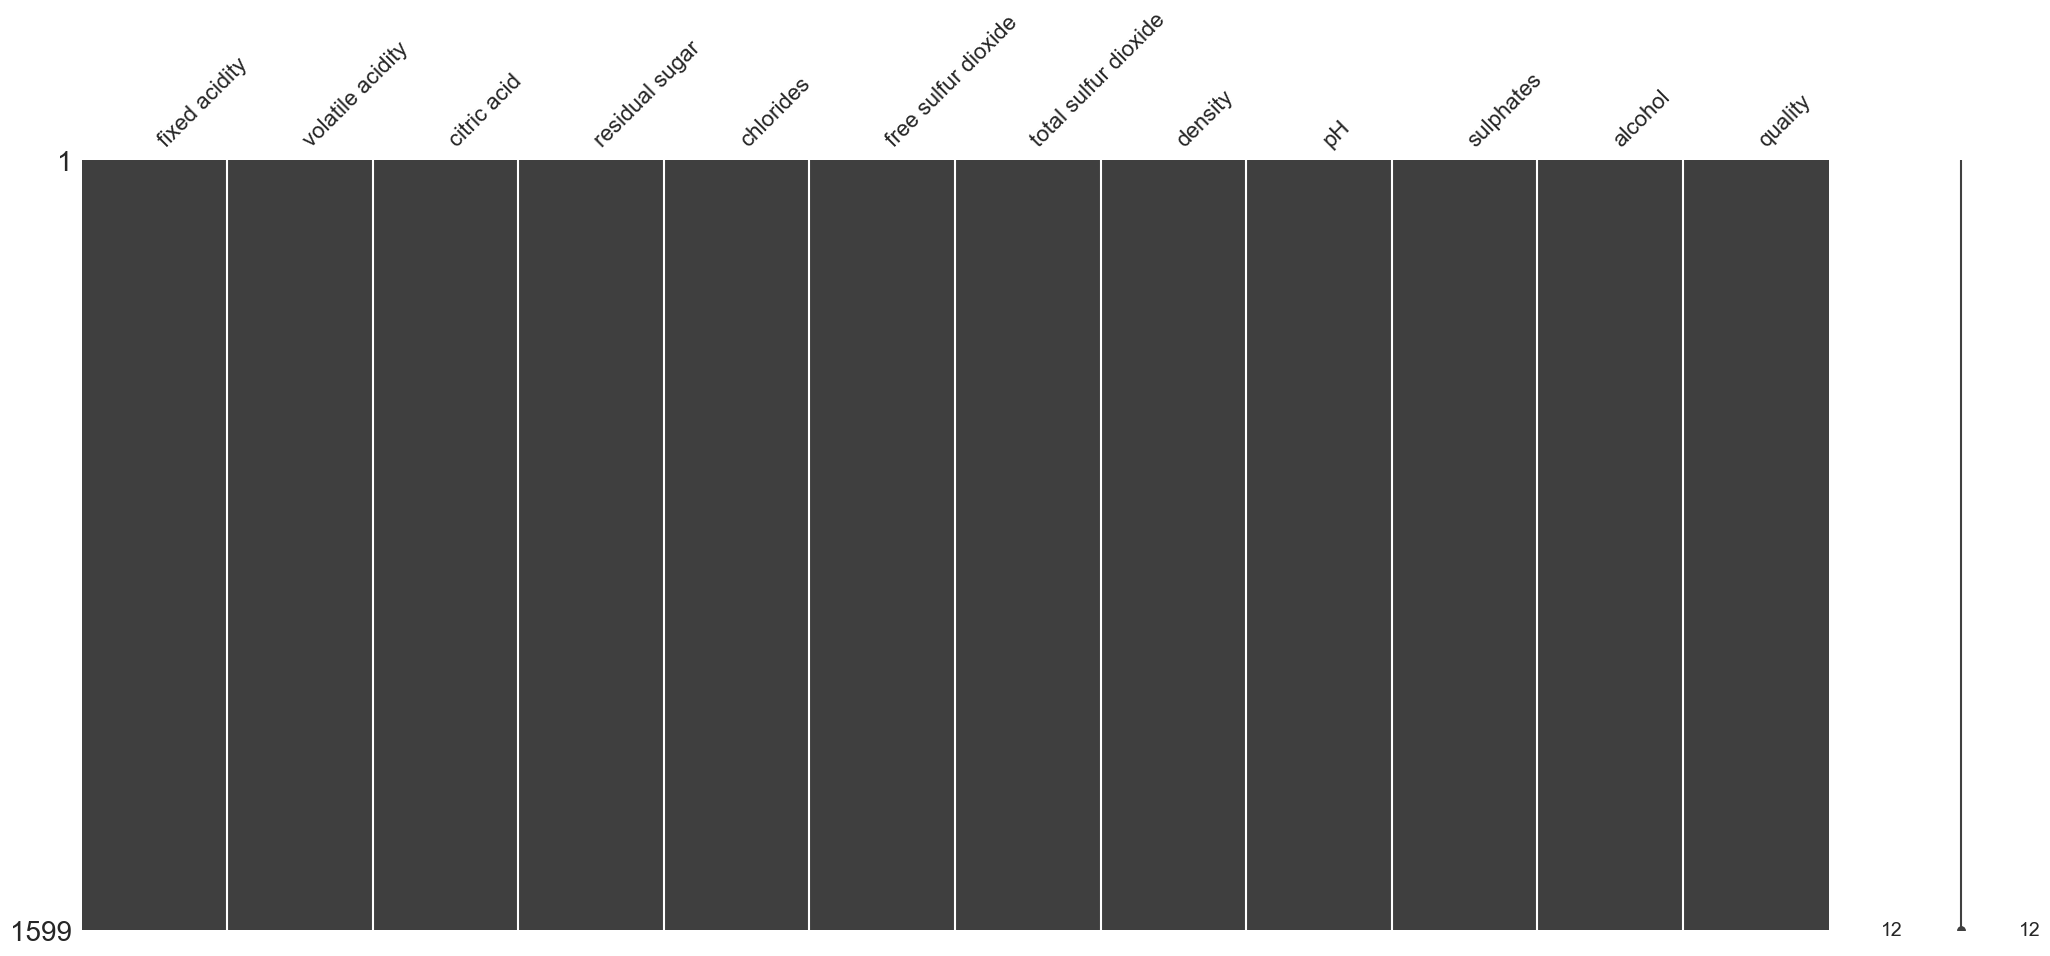

<IPython.core.display.Javascript object>

In [17]:
# matrix showing the location of missing values
msno.matrix(data)

In [18]:
# proportion of missing values
data.isna().sum() / data.count()

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

<IPython.core.display.Javascript object>

## Duplicate values

In [19]:
data[data.duplicated()]  # get duplicated rows

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4                    11.0                  34.0  0.99780  3.51       0.56   
11                   17.0                 102.0  0.99780  3.35       0.80   
27                   10.0                  37.0  0.99660  3.17       0.91   
40                   12.0                  87.0  0.99780  3.33       0.83   
65                    4.0                  11.0  0.99620  3.41       0.39   
...                   ...                   ...      ...   ...        ...   
1563                 12.0                  20.0  0.99546  3.29       0.54   
1564                 12.0                  20.0  0.99546  3.29       0.54   
1567                 12.0                  20.0  0.99546  3.29       0.54   
1581                 24.0                  32.0  0.99402  3.54       0.60   
1596                 29.0                  40.0  0.99574  3.42       0.75   

      alcohol  quality  
4         9.4        5  
11       10.5        5  
27        9.5        5  
40       10.5        5  
65       10.9        5  
...       ...      ...  
1563     10.1        5  
1564     10.1        5  
1567     10.1        5  
1581     11.3        5  
1596     11.0        6  

[240 rows x 12 columns]

<IPython.core.display.Javascript object>

In [20]:
# proportion of duplicate values
data[data.duplicated()].count() / data.count()

fixed acidity           0.150094
volatile acidity        0.150094
citric acid             0.150094
residual sugar          0.150094
chlorides               0.150094
free sulfur dioxide     0.150094
total sulfur dioxide    0.150094
density                 0.150094
pH                      0.150094
sulphates               0.150094
alcohol                 0.150094
quality                 0.150094
dtype: float64

<IPython.core.display.Javascript object>

There are 240 duplicated rows (15% of total rows). Since we don't know whether they are wine types with identical properties or just duplicate entries, we will drop these rows.

In [21]:
data.drop_duplicates(keep="first", inplace=True)
data_upd.drop_duplicates(keep="first", inplace=True)

<IPython.core.display.Javascript object>

In [22]:
group0 = data_upd[data_upd["quality_category"] == 0]
group1 = data_upd[data_upd["quality_category"] == 1]

print("Sample size for bad wine: ", len(group0))
print("Sample size for good wine: ", len(group1))

Sample size for bad wine:  640
Sample size for good wine:  719


<IPython.core.display.Javascript object>

# 2. Outliers

## Main insights and observations:
- There are outliers for each column in the dataset. But the values are in the plausible ranges.

## Additional notes:
- We have performed quantile-based flooring and capping to get rid of extreme outliers that lie below 5% and above 95% thresholds. We will use this version of the dataframe mainly when fitting linear models to data.
- After getting rid of the extreme outliers, there are still some of them left in columns 'residual sugar' and 'chlorides'.


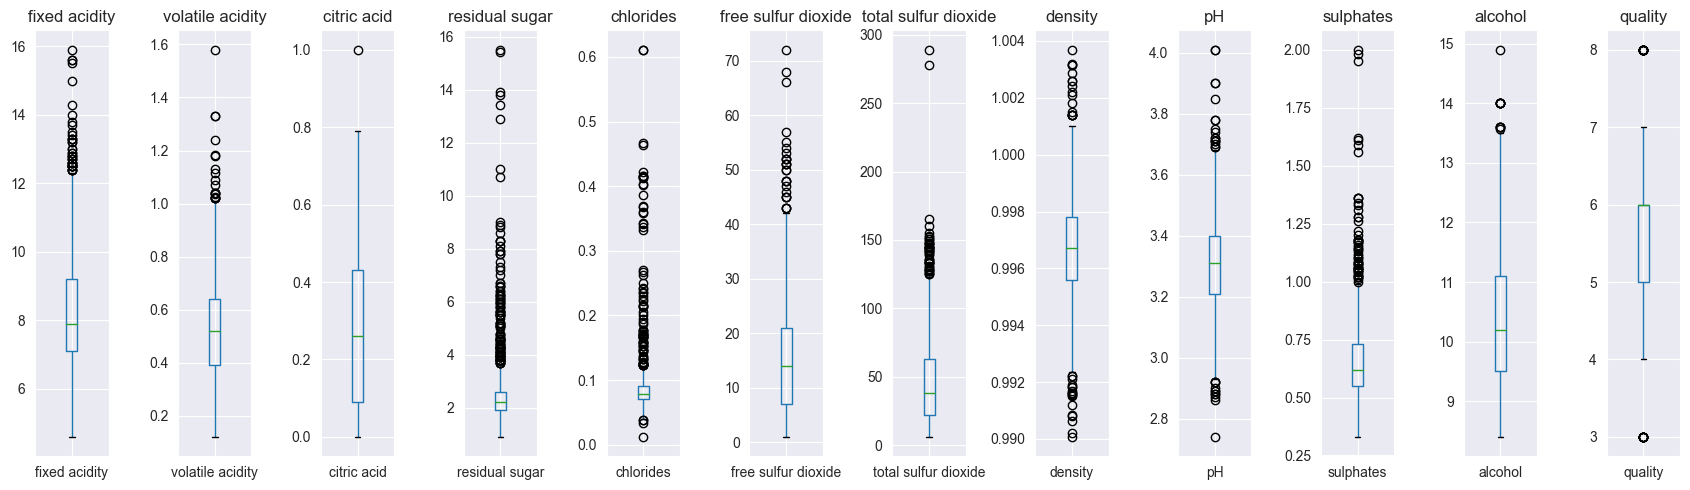

<IPython.core.display.Javascript object>

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=len(data.columns), figsize=(17, 5))

for i, column in enumerate(data.columns):
    ax = (
        axes[i] if len(data.columns) > 1 else axes
    )  # subplot corresponding to the column
    data.boxplot(column=column, ax=ax)
    ax.set_title(column)

plt.tight_layout()  
plt.show()

There are many outliers, but they seem to be in plausible range. We will keep these outliers for the EDA part of this project. And we will create a separate dataframe without extreme values that lay below 5% and above 95% of data using quantile based flooring and capping, which we will use during fitting statistical models to data.

In [24]:
data_x = data.loc[:, data.columns != "quality"]
data_y = data["quality"]

<IPython.core.display.Javascript object>

In [25]:
floor_cap_data = hf.q_based_floor_cap(data, data_x, [0.05, 0.95])
floor_cap_data_upd = hf.q_based_floor_cap(data_upd, data_x, [0.05, 0.95])

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Boxplot of Standardized Data for All Features without Extreme Outliers')

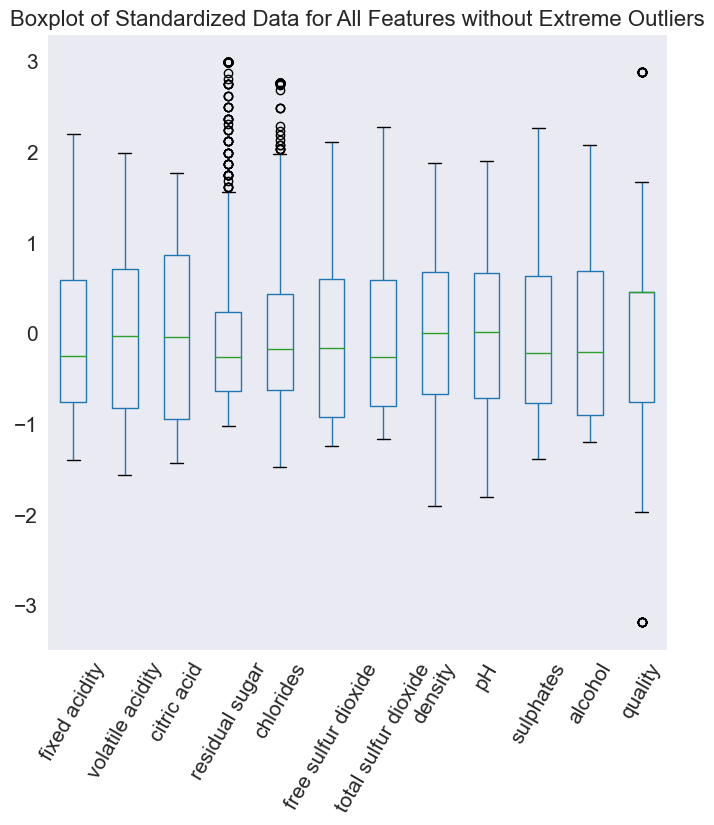

<IPython.core.display.Javascript object>

In [26]:
# standardize the dataframe for better visualization of outliers
standard_d = (
    floor_cap_data - floor_cap_data.mean(numeric_only=True)
) / floor_cap_data.std(numeric_only=True)

# visualize the boxplot for the columns of the standardized dataframe
standard_d.boxplot(grid=False, rot=60, fontsize=15, figsize=(8, 8))
plt.title("Boxplot of Standardized Data for All Features without Extreme Outliers", fontsize=16)

Now, there are fewer outliers. Supposedly, it should work better for the linear models that we are going to use. We will use both variants, with and without extreme outliers, and check how does it effect the outcomes of linear models.

# 3. Distributions of values

### Main insights and observations:
- The values in the majority of features are not normally distributed.
- In the quality column, the majority of ratings are 5 and 6. Encoded quality column into 0 and 1s (bad and good wine) creates approximately equal sample group sizes.
- Based on the visualizations, the most significant visible difference between good and bad wine groups are for columns 'alcohol', 'volatile acidity', and 'citric acid'. The most insignificant differences are for columns 'pH' and 'residual sugar'.

### Additional notes:
- We have visualized distributions with the encoded quality column (0 and 1s as bad and good wine groups);
- We have visualized the distributions with both the original dataframe and with a dataframe without extreme outliers. The plots and summary statistics are different for these two dataframes.
- For some plots, we have used normalized data (in the 0-1 range) to better feel the difference in summary statistics.


In [27]:
n_colors = len(data["quality"].unique())
red_colors = sns.color_palette("Reds", n_colors=n_colors // 2)[::-1]
green_colors = sns.color_palette("Greens", n_colors=n_colors - (n_colors // 2))
custom_palette = red_colors + green_colors

<IPython.core.display.Javascript object>

Let's look at the destributions of values in each column:

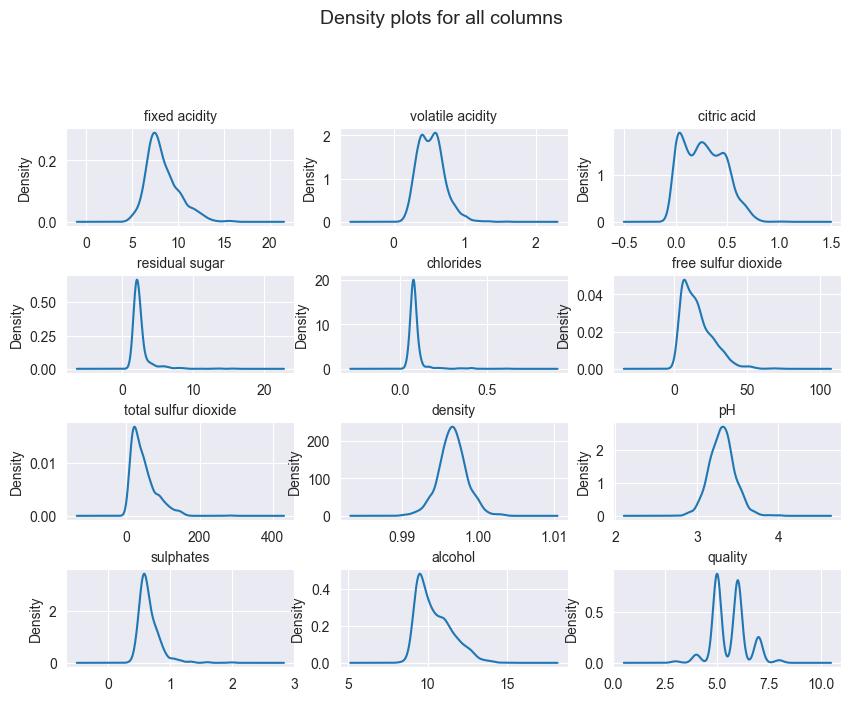

<IPython.core.display.Javascript object>

In [28]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 7))
fig.subplots_adjust(hspace=0.5) 

for col, ax in zip(data.columns, axes.flatten()):
    data[col].plot(kind="density", ax=ax)
    ax.set_title(
        col, fontsize=10
    )  
    ax.set_xlabel("")  

fig.suptitle("Density plots for all columns", fontsize=14, y=1.05)

plt.show()

Let's visualize countplots for the 'quality' and 'quality_category'(encoded into 0 and 1s) columns.

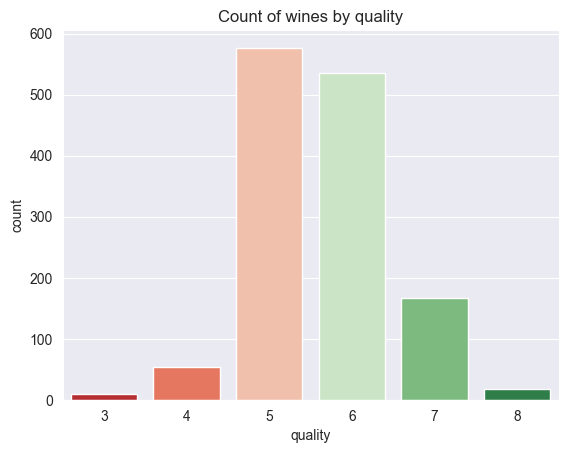

<IPython.core.display.Javascript object>

In [29]:
sns.countplot(x=data.quality, palette=custom_palette, alpha=1,
)
plt.title(
    "Count of wines by quality"
)
plt.show()


Most of the wines in this dataset have quality 5 and higher.

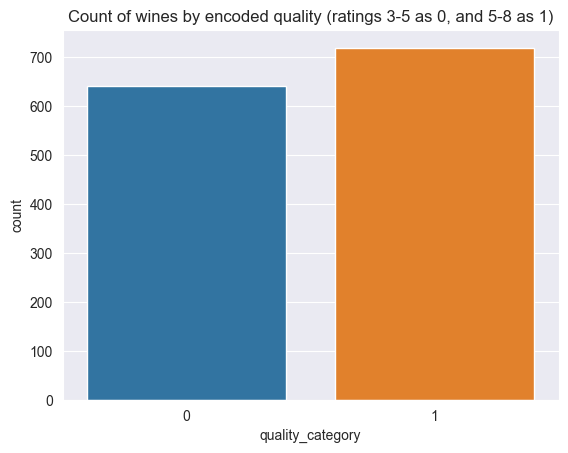

<IPython.core.display.Javascript object>

In [30]:
sns.countplot(
    x=data_upd.quality_category,
)
plt.title("Count of wines by encoded quality (ratings 3-5 as 0, and 5-8 as 1)")
plt.show()

Sample sizes for good and bad wine groups are approximately the same.

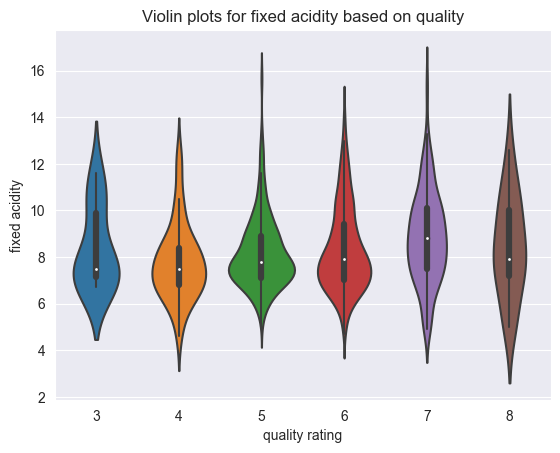

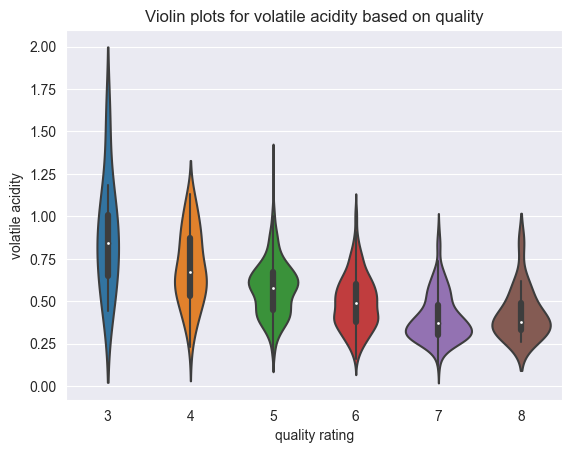

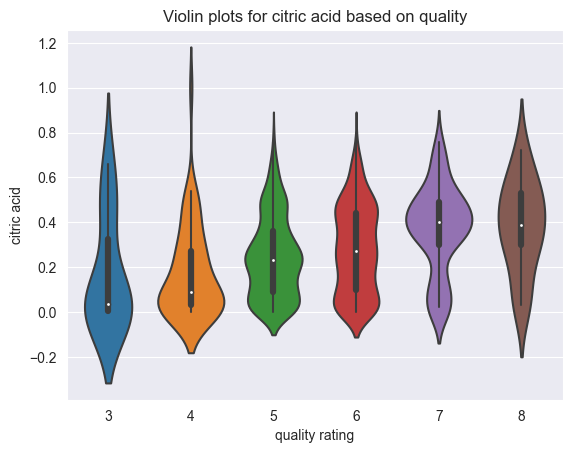

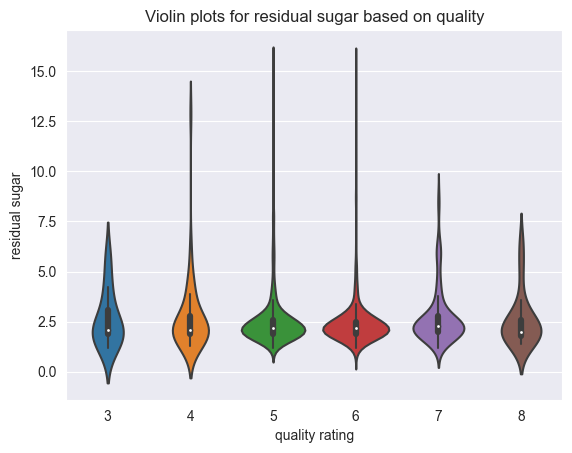

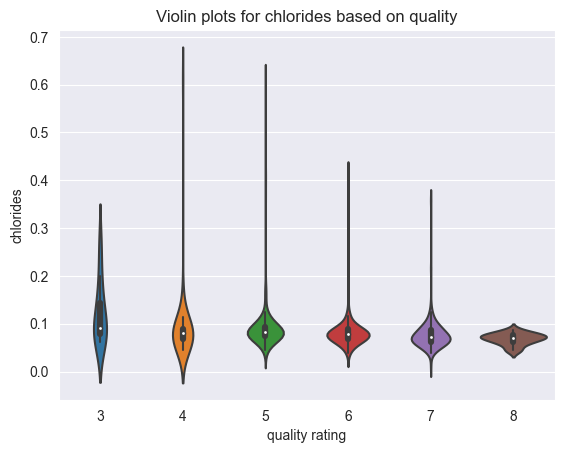

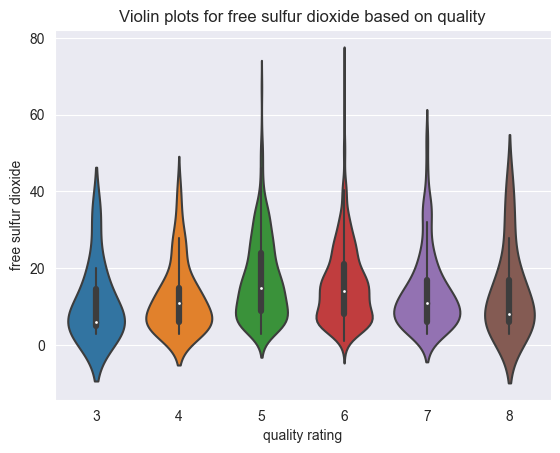

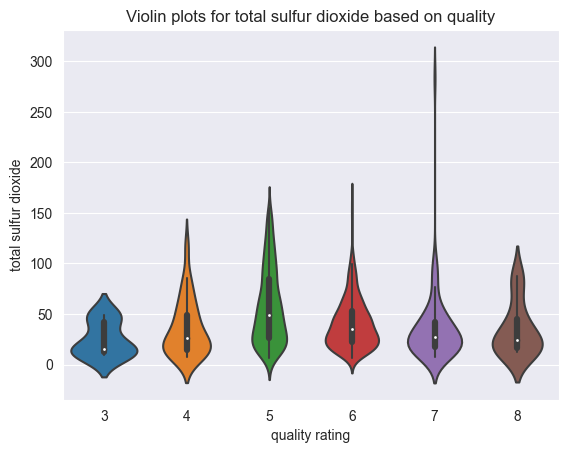

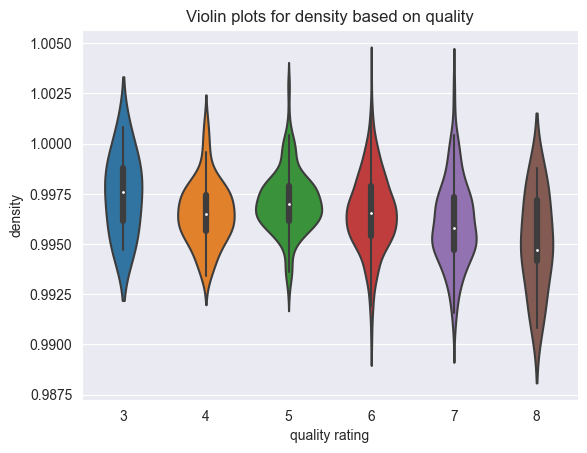

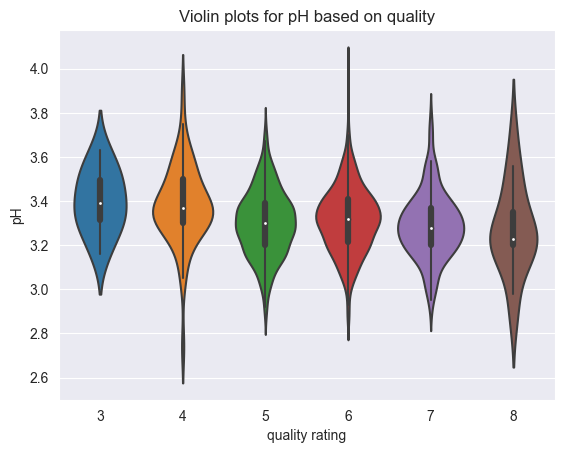

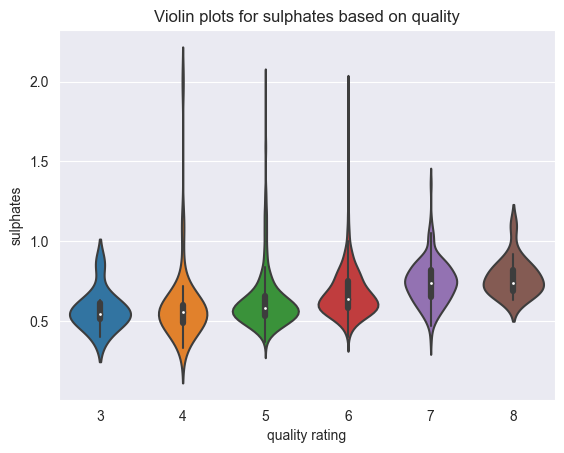

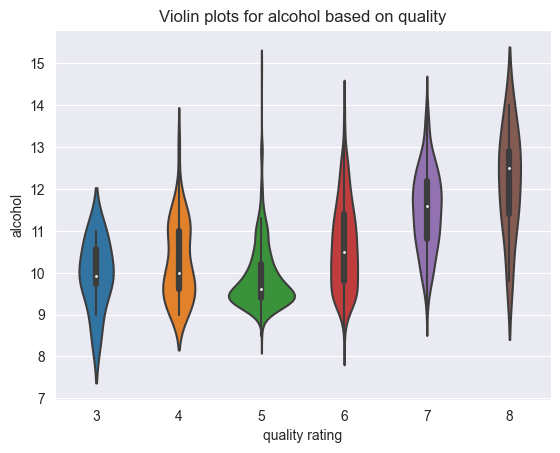

<IPython.core.display.Javascript object>

In [31]:
selected_columns = data.loc[:, data.columns != "quality"]

for i, c in enumerate(selected_columns.columns):
    plt.figure(i)
    sns.violinplot(
        x="quality",
        y=f"{c}",
        data=data,
    )

    # Set title and labels
    plt.title(f"Violin plots for {c} based on quality")
    plt.xlabel("quality rating")
    plt.ylabel(f"{c}")

plt.show()

<Figure size 700x400 with 0 Axes>

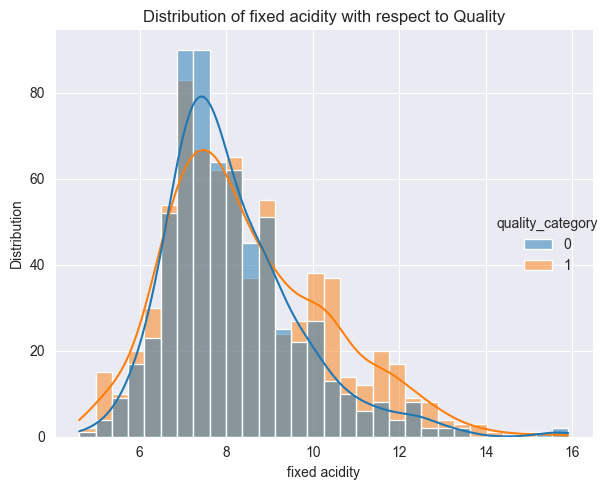

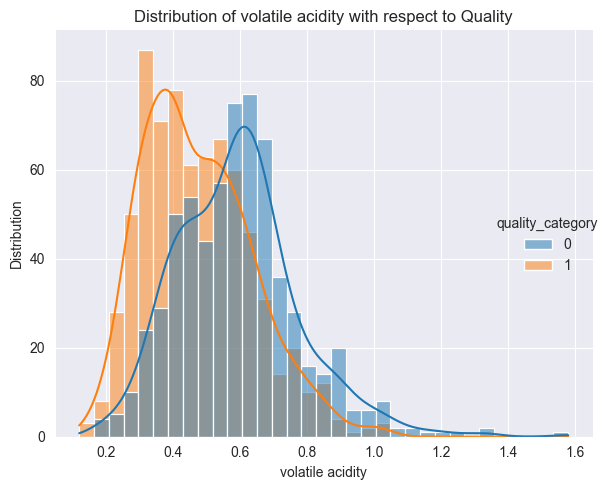

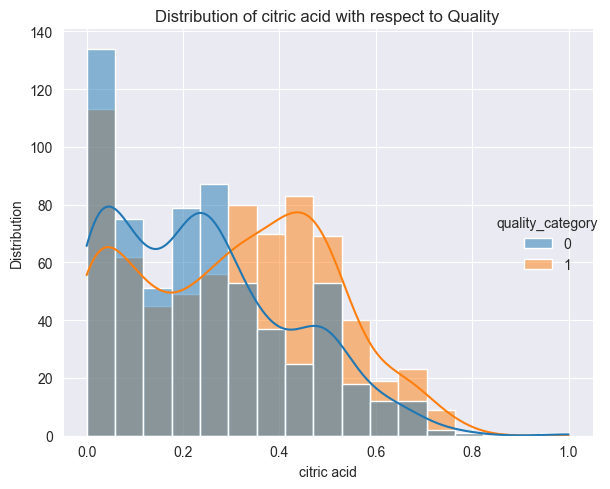

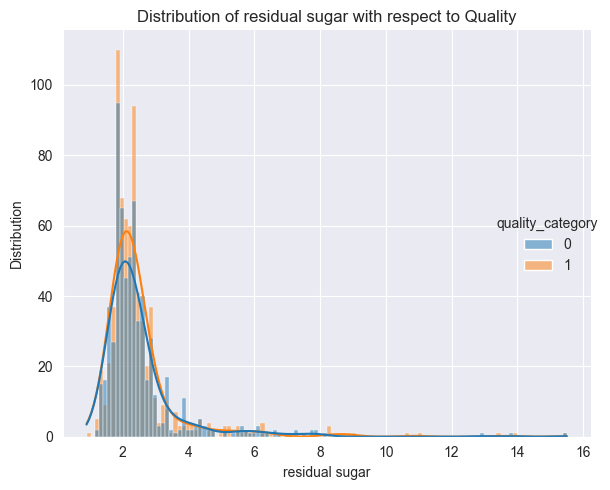

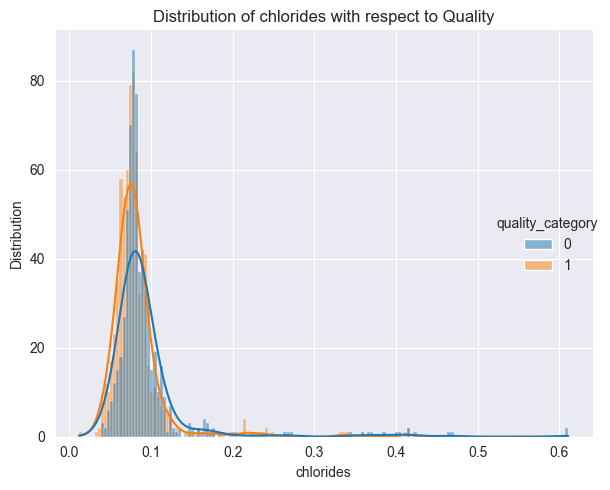

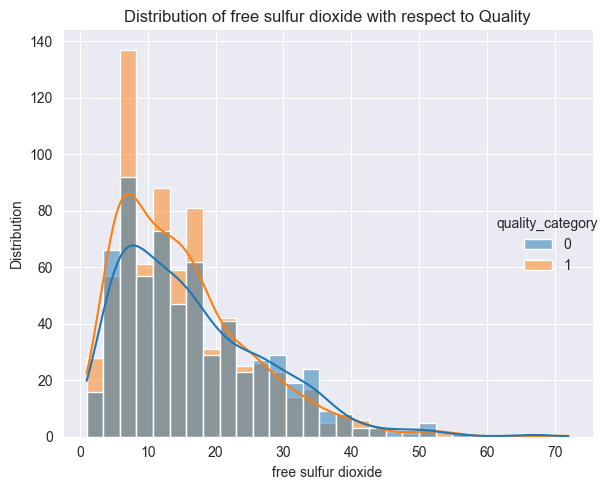

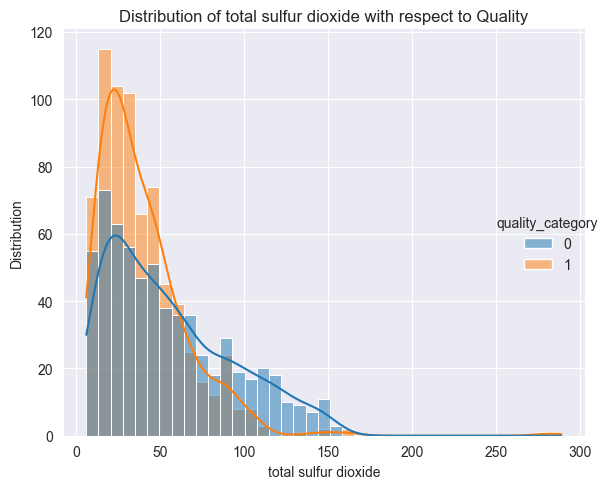

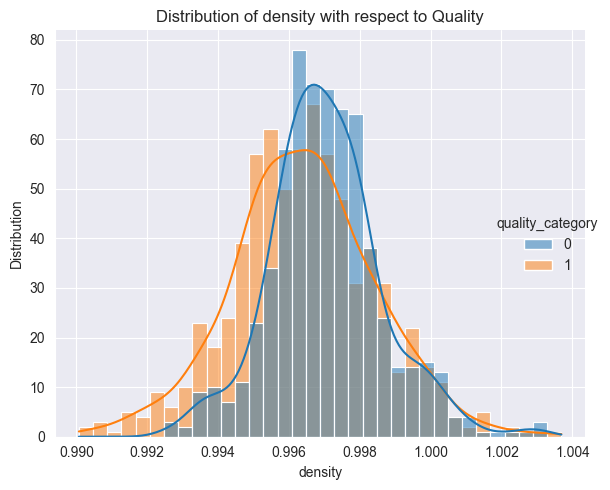

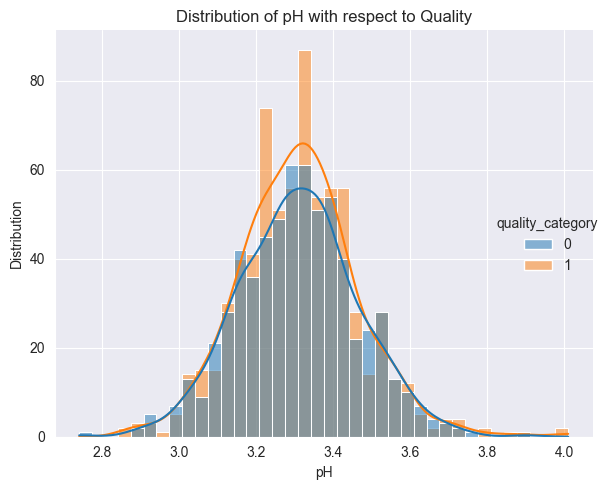

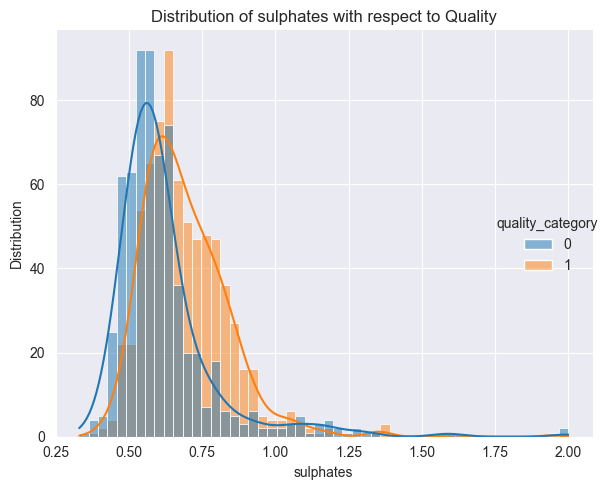

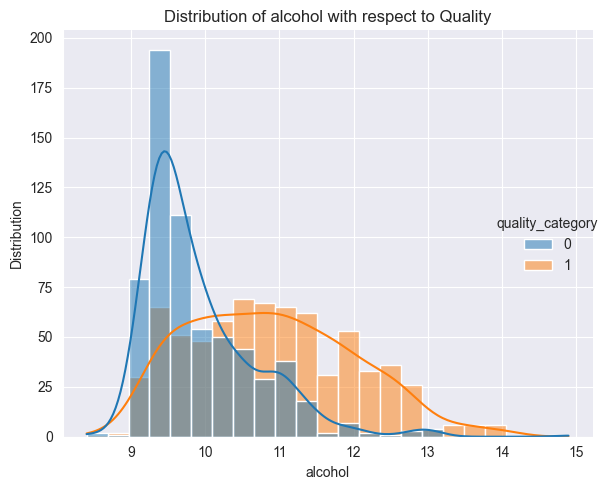

<IPython.core.display.Javascript object>

In [32]:
selected_columns = data_upd.loc[
    :, ~data_upd.columns.isin(["quality", "quality_category"])
]

for i, c in enumerate(selected_columns.columns):
    plt.figure(i, figsize=(7, 4))
    sns.displot(
        data=data_upd,
        x=c,
        hue="quality_category",
        alpha=0.5,
        kde=True,
    )

    # Set title and labels
    plt.title(f"Distribution of {c} with respect to Quality")
    plt.xlabel(c)
    plt.ylabel("Distribution")
    plt.tight_layout()

plt.show()

Let's explore the difference in the distribution of values between good(rating 6-8) and bad(ratings 3-5) wines. To better see the difference, we will normalize data to have 0 to 1 range.

In [33]:
# normalize the dataframe
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(data_upd), columns=data_upd.columns)

<IPython.core.display.Javascript object>

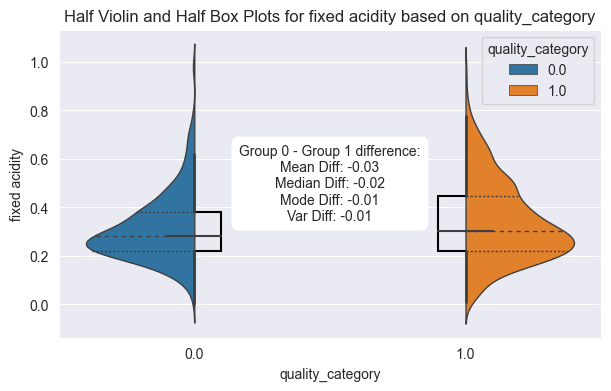

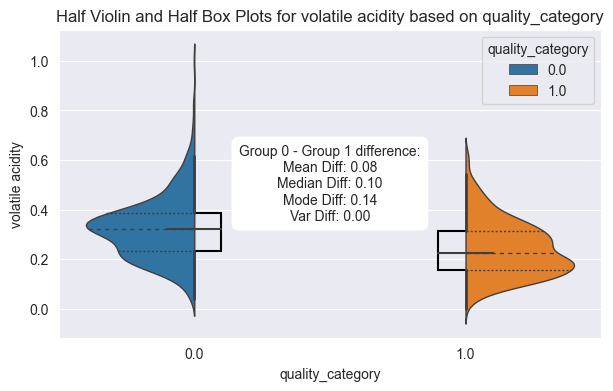

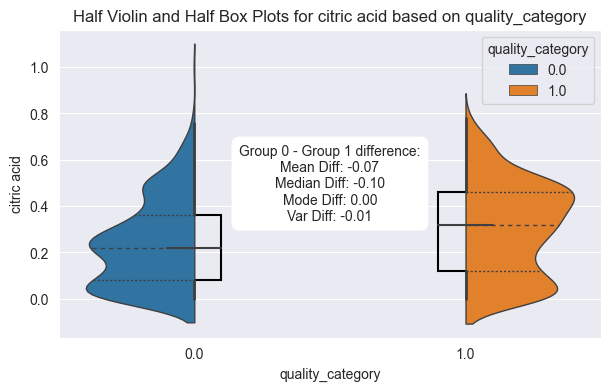

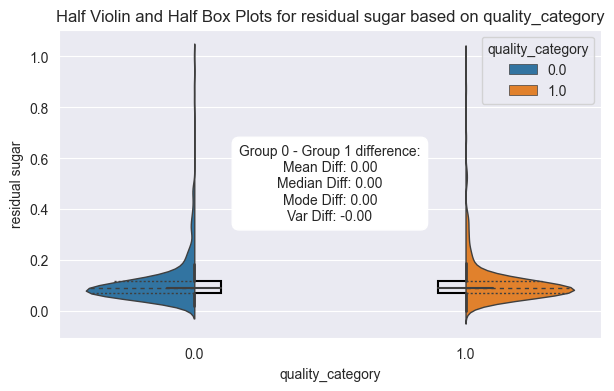

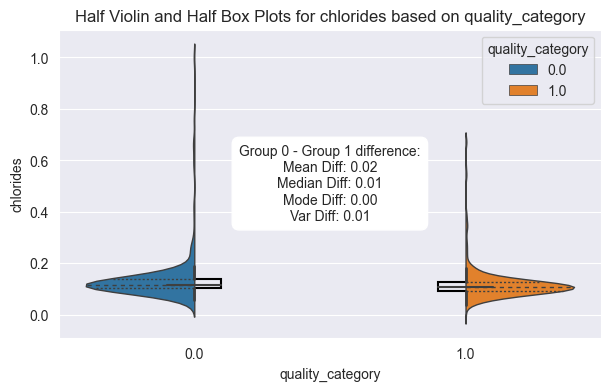

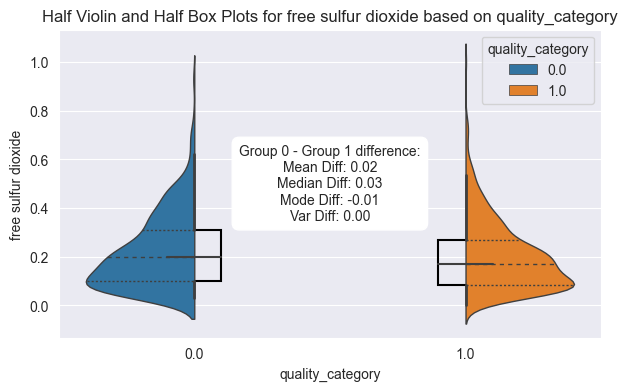

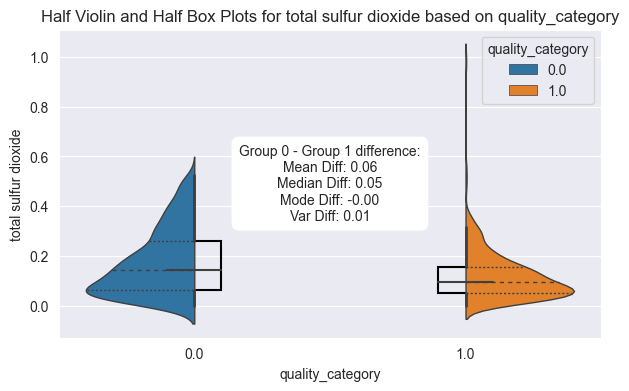

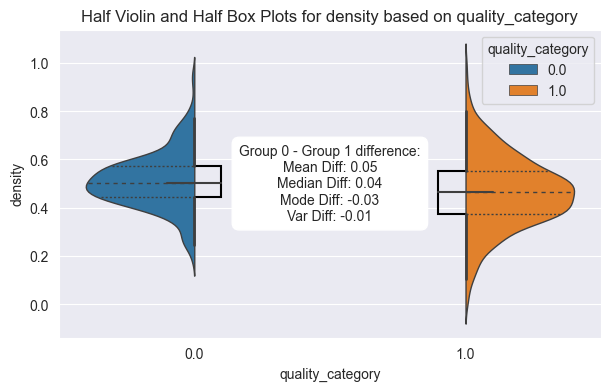

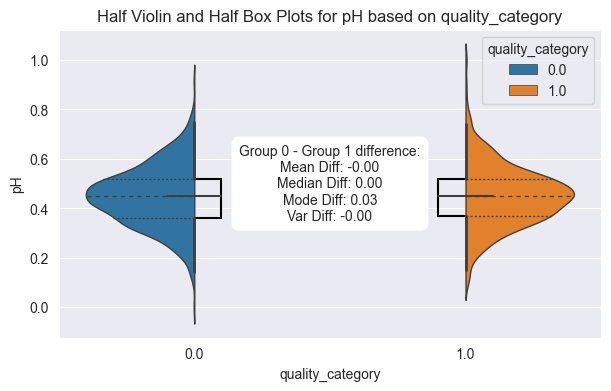

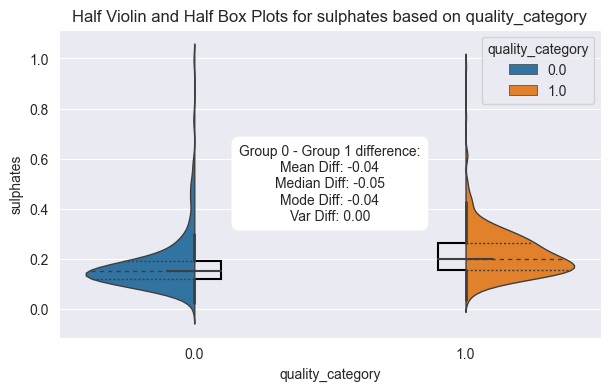

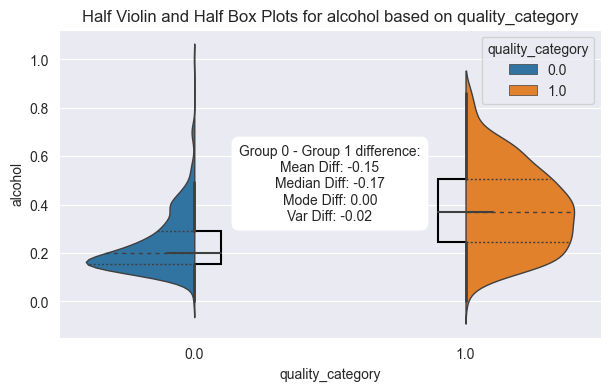

<IPython.core.display.Javascript object>

In [34]:
selected_col_norm = normalized_df.loc[:, ~normalized_df.columns.isin(["quality", "quality_category"])]

hf.visualize_two_violin_boxplots_stats(normalized_df, selected_col_norm, "quality_category", 0, 1)

Now, let's visualize the same but without extreme outliers (at floor: 5% and cap: 95%):

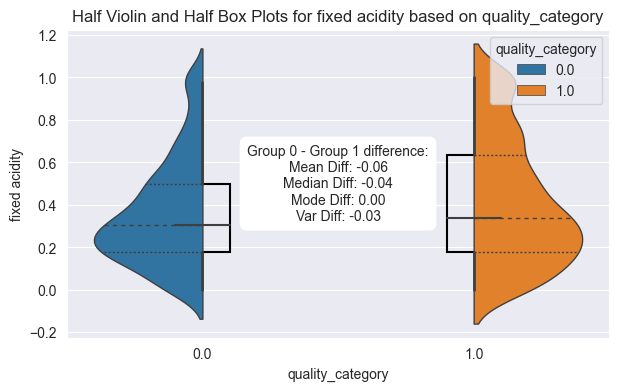

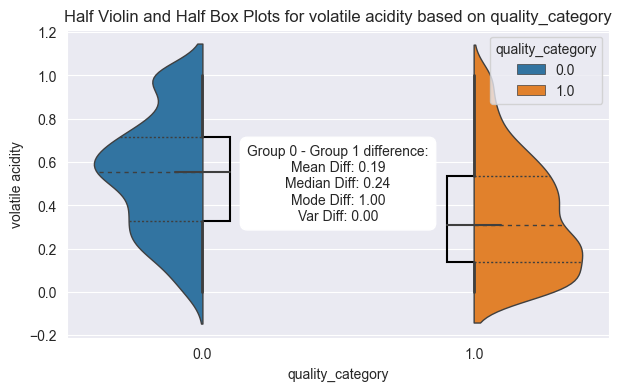

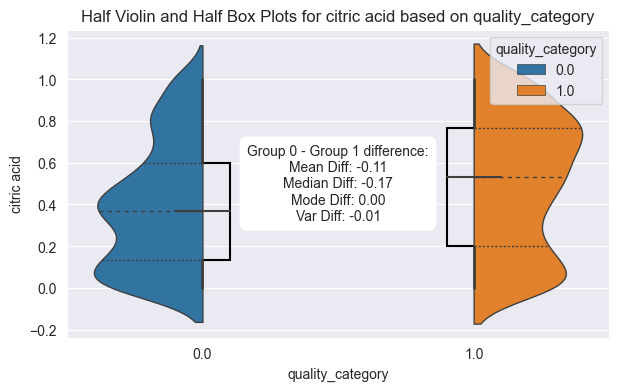

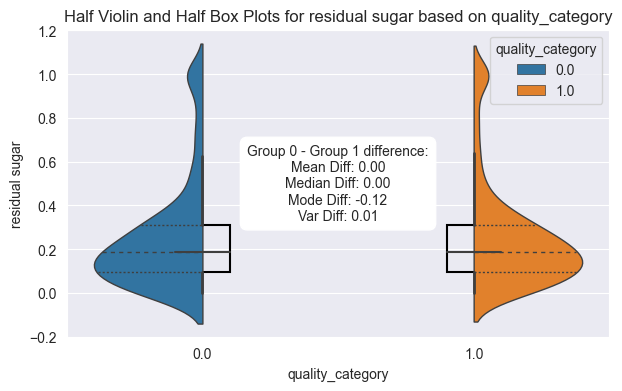

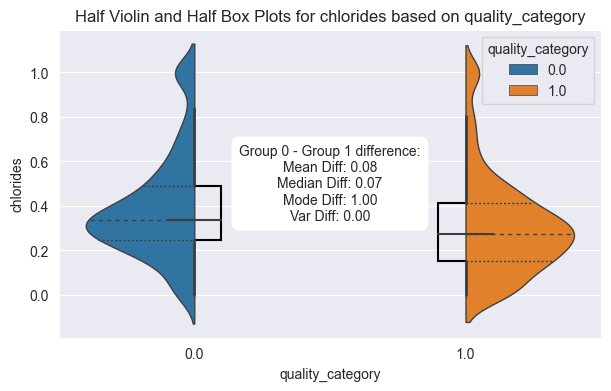

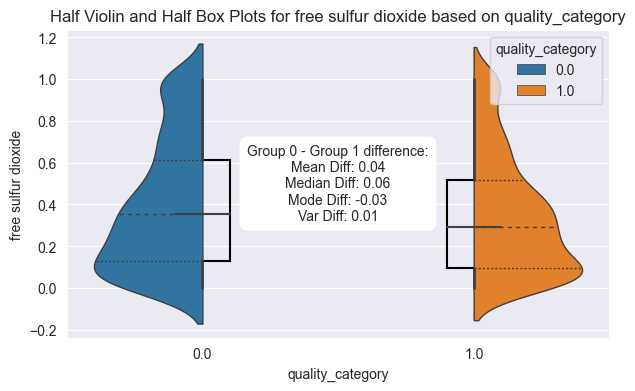

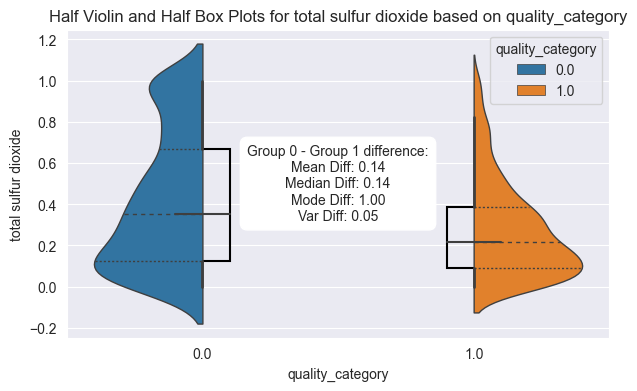

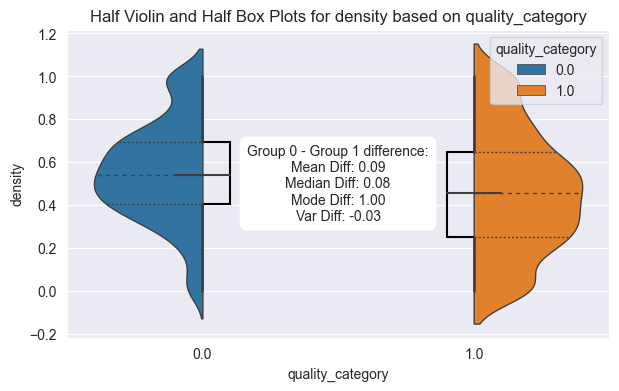

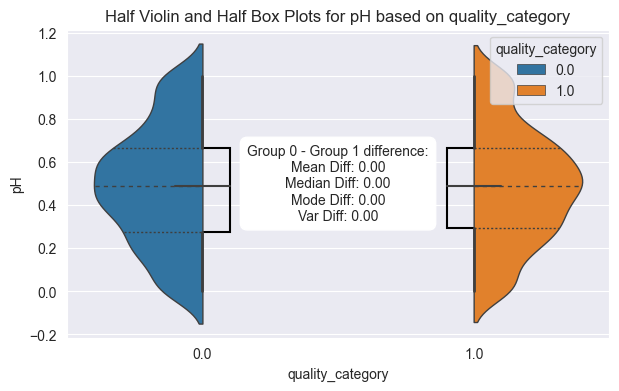

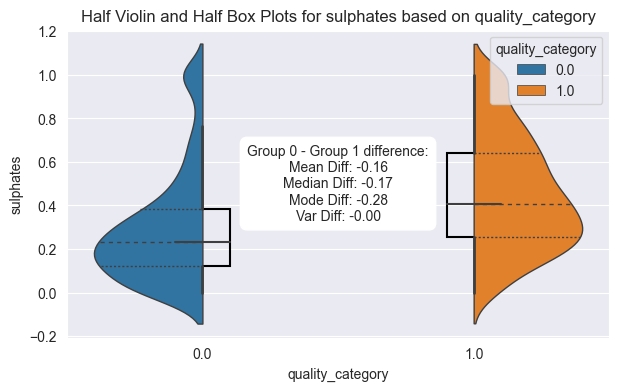

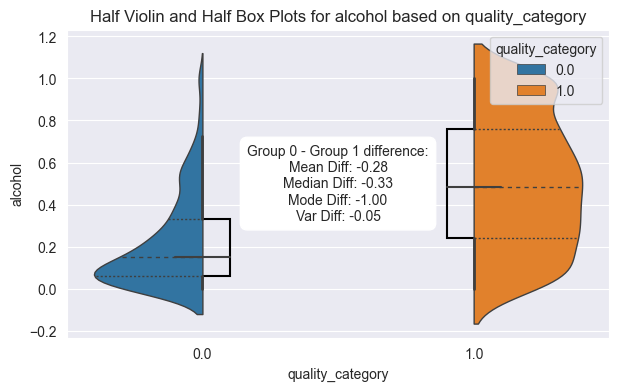

<IPython.core.display.Javascript object>

In [35]:
# normalize the dataframe
normalized_df_q = pd.DataFrame(scaler.fit_transform(floor_cap_data_upd), columns=floor_cap_data_upd.columns)
selected_col_norm_upd = normalized_df_q.loc[:, ~normalized_df_q.columns.isin(["quality", "quality_category"])]

hf.visualize_two_violin_boxplots_stats(normalized_df_q, selected_col_norm_upd, "quality_category", 0, 1)

## Correlations

In [36]:
scale_standard = StandardScaler()
scale_standard.fit_transform(data)
data_standardized = pd.DataFrame(
    scale_standard.fit_transform(data), columns=data.columns
)

<IPython.core.display.Javascript object>

In [37]:
data_standardized.describe()

fixed acidity  volatile acidity   citric acid  residual sugar  \
count   1.359000e+03      1.359000e+03  1.359000e+03    1.359000e+03   
mean   -6.274108e-16      1.463959e-16  2.091369e-17   -1.202537e-16   
std     1.000368e+00      1.000368e+00  1.000368e+00    1.000368e+00   
min    -2.137008e+00     -2.238023e+00 -1.393258e+00   -1.200903e+00   
25%    -6.972071e-01     -7.623226e-01 -9.328165e-01   -4.611571e-01   
50%    -2.364707e-01     -5.180013e-02 -6.309377e-02   -2.392334e-01   
75%     5.122260e-01      6.040667e-01  8.066290e-01    5.666484e-02   
max     4.370894e+00      5.741690e+00  3.722758e+00    9.599383e+00   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  1.359000e+03         1.359000e+03          1.359000e+03  1.359000e+03   
mean   1.882232e-16        -8.365477e-17          4.182739e-17  5.286982e-14   
std    1.000368e+00         1.000368e+00          1.000368e+00  1.000368e+00   
min   -1.542254e+00        -1.426094e+00         -1.222457e+00 -3.553604e+00   
25%   -3.671819e-01        -8.515696e-01         -7.433672e-01 -5.935822e-01   
50%   -1.848432e-01        -1.812915e-01         -2.642772e-01 -4.789431e-03   
75%    5.827504e-02         4.889867e-01          4.843008e-01  5.947087e-01   
max    1.059340e+01         5.372442e+00          7.251446e+00  3.736721e+00   

                 pH     sulphates       alcohol       quality  
count  1.359000e+03  1.359000e+03  1.359000e+03  1.359000e+03  
mean  -1.202537e-15 -5.542129e-16  1.254822e-16  5.332992e-16  
std    1.000368e+00  1.000368e+00  1.000368e+00  1.000368e+00  
min   -3.676535e+00 -1.926712e+00 -1.878873e+00 -3.186363e+00  
25%   -6.438707e-01 -6.371766e-01 -8.619244e-01 -7.570404e-01  
50%    1.376908e-03 -2.268699e-01 -2.147753e-01  4.576206e-01  
75%    5.820998e-01  4.178978e-01  6.172735e-01  4.576206e-01  
max    4.518110e+00  7.862034e+00  4.130369e+00  2.886943e+00

<IPython.core.display.Javascript object>

Text(0.5, 1.02, 'Scatterplot Matrix by Quality Category')

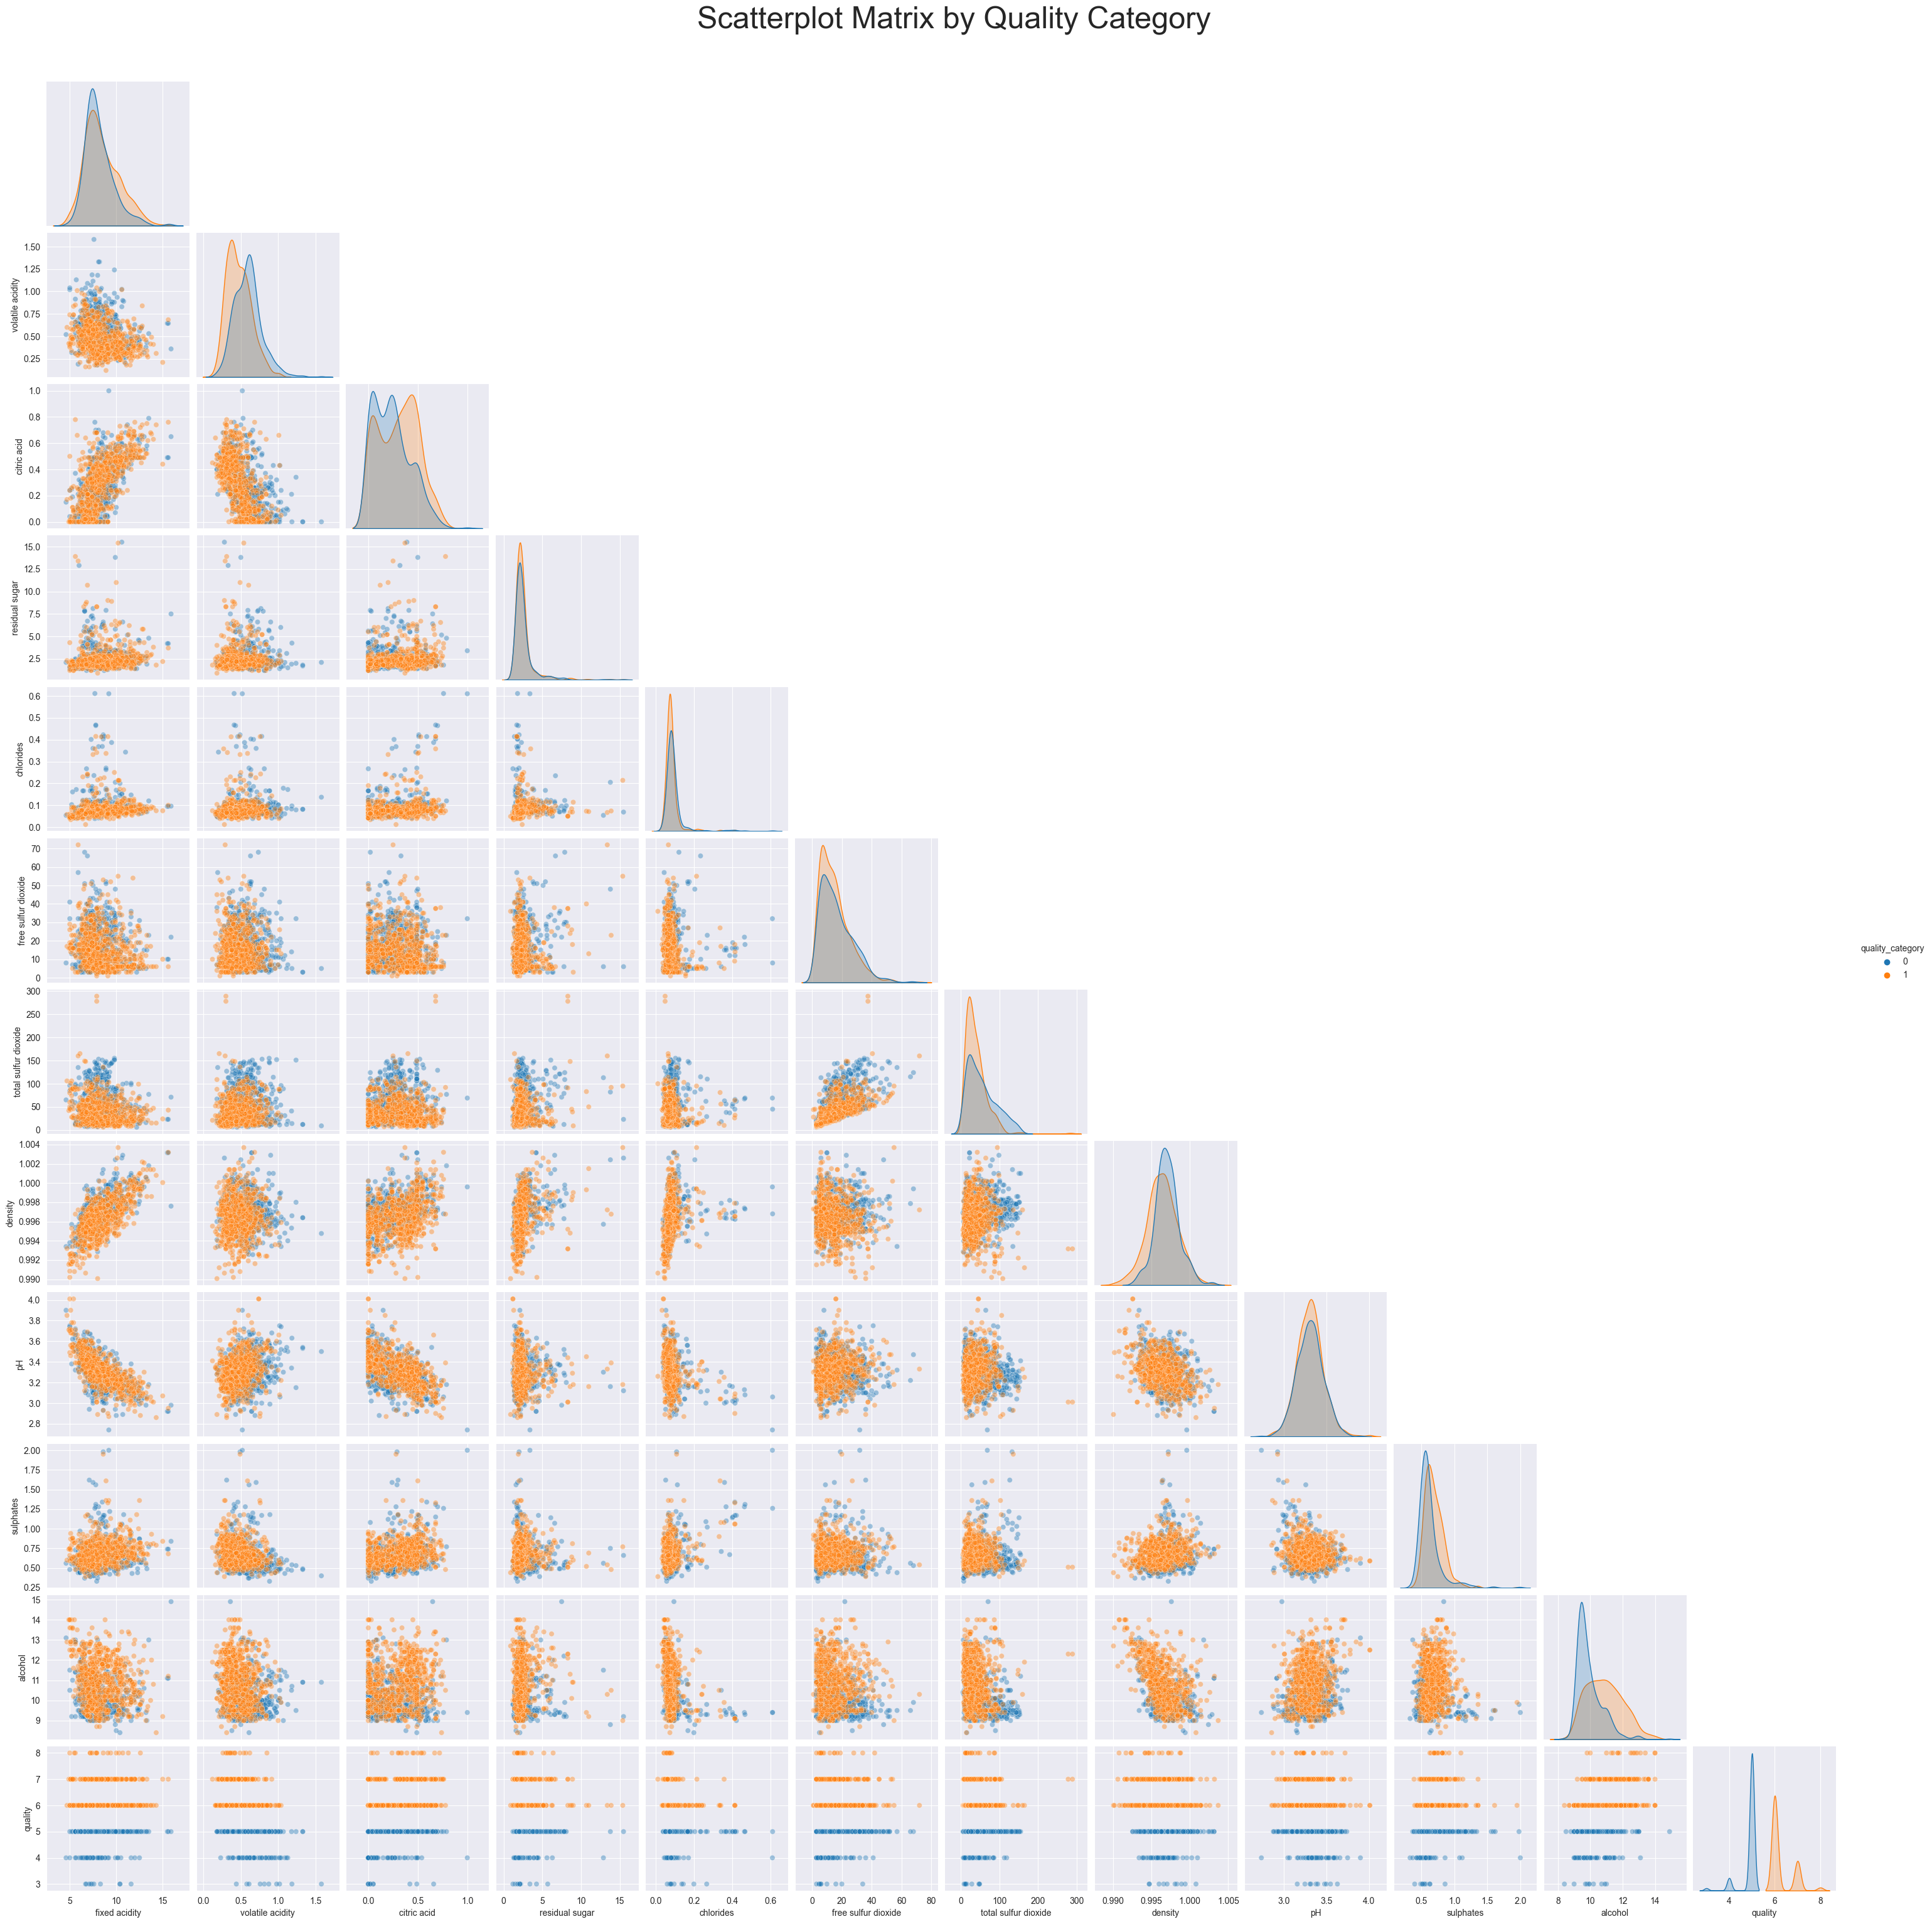

<IPython.core.display.Javascript object>

In [38]:
pair_plot = sns.pairplot(
    data_upd, corner=True, hue="quality_category", plot_kws={"alpha": 0.4}
)
plt.text(
    0.5,
    1.02,
    "Scatterplot Matrix by Quality Category",
    transform=pair_plot.fig.transFigure,
    ha="center",
    va="center",
    fontsize=35,
)

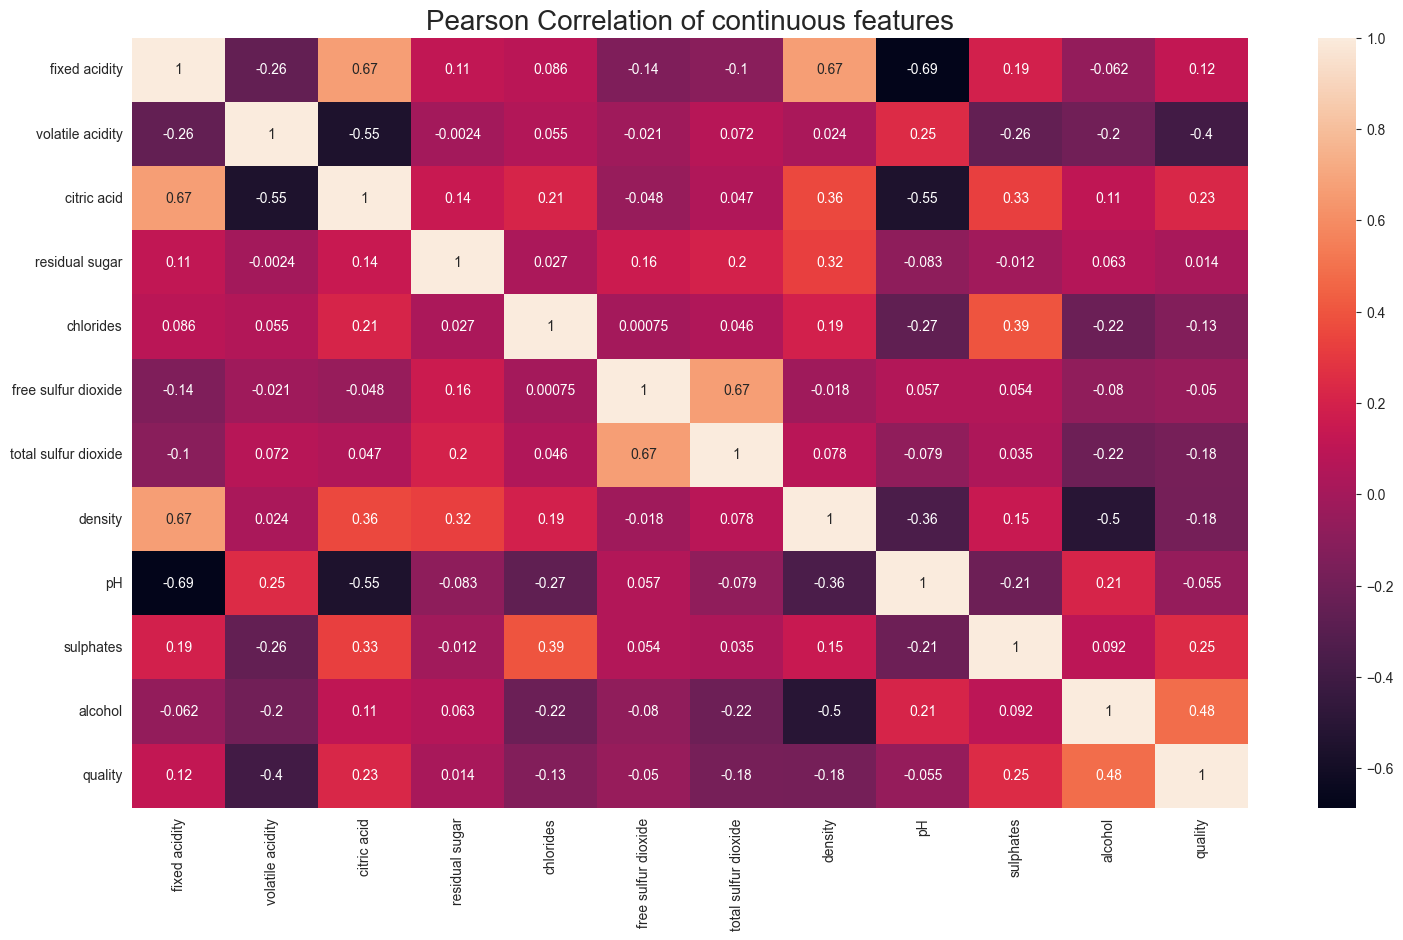

<IPython.core.display.Javascript object>

In [39]:
# Plot correlations with annotations
plt.figure(figsize=(18, 10))
plt.title("Pearson Correlation of continuous features", fontsize=20)
ax = sns.heatmap(data.corr(numeric_only=True), annot=True)

In [40]:
# create a dataframe with correlations
corr_data = data.corr(numeric_only=True, method="pearson")

# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
upper_corr_data = corr_data.where(np.triu(np.ones(corr_data.shape), k=1).astype(bool))

# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_data.unstack().dropna()

# Sort correlation pairs
sorted_corr_data = unique_corr_pairs.drop_duplicates()
sorted_corr_data.sort_index(inplace=True)

<IPython.core.display.Javascript object>

Now, let's see what features are significantly correlated (less than -0.3 or more than 0.3, based on the picture below) 

Source: https://towardsdatascience.com/eveything-you-need-to-know-about-interpreting-correlations-2c485841c0b8

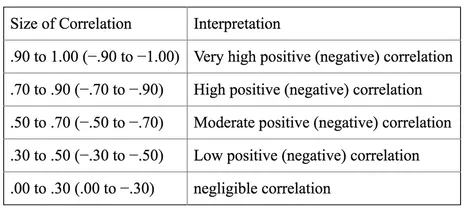

In [41]:
strong_corr = sorted_corr_data[(sorted_corr_data < -0.3) | (sorted_corr_data > 0.3)]
strong_corr.sort_values(ascending=False)

density               fixed acidity          0.670195
citric acid           fixed acidity          0.667437
total sulfur dioxide  free sulfur dioxide    0.667246
quality               alcohol                0.480343
sulphates             chlorides              0.394557
density               citric acid            0.357962
sulphates             citric acid            0.326062
density               residual sugar         0.324522
pH                    density               -0.355617
quality               volatile acidity      -0.395214
alcohol               density               -0.504995
pH                    citric acid           -0.550310
citric acid           volatile acidity      -0.551248
pH                    fixed acidity         -0.686685
dtype: float64

<IPython.core.display.Javascript object>

In [42]:
heatmap_data = pd.DataFrame(strong_corr.reset_index())
heatmap_data.rename(
    columns={"level_0": "var_1", "level_1": "var_2", 0: "corr"}, inplace=True
)
correlation_matrix = heatmap_data.pivot(
    index=["var_1"], columns=["var_2"], values="corr"
)

<IPython.core.display.Javascript object>

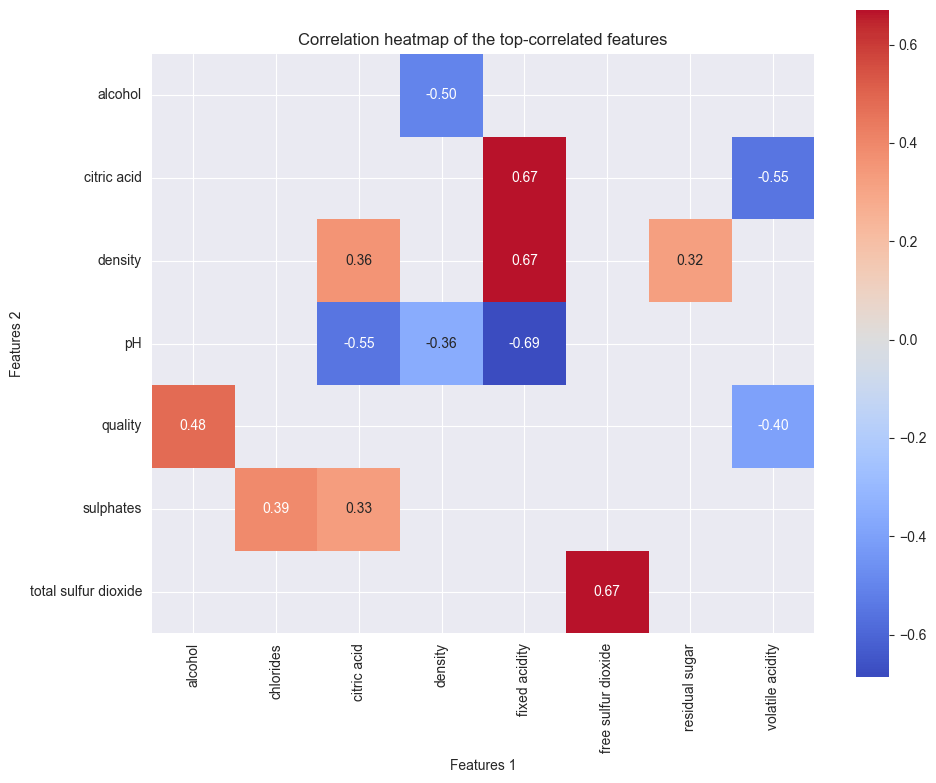

<IPython.core.display.Javascript object>

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, annot=True, cmap="coolwarm", square=True, center=0, fmt=".2f"
)

# Set the title and adjust the layout
plt.title("Correlation heatmap of the top-correlated features")
plt.xlabel("Features 1")  # Set the x-axis title
plt.ylabel("Features 2")  # Set the y-axis title

plt.tight_layout()

plt.show()

# 4. Statistical Inference

## Main insights and observations:
- Most of the columns don't have a normal distribution of values, even without outliers. Based on the Shapiro-Wilk test for normality, Levene's Test, and D'Agostino and Pearson's omnibus test for normality, all of the sample groups don't meet the assumptions for the t-test.
- Based on the results of the Mann-Whitney U test, most features have significantly different medians for bad and good wines, except for residual sugar and pH.
- Features with the most significant hypothesis testing results are: volatile acidity, citric acid, citric acid, chlorides, total sulfur dioxide, density, sulphates, and alcohol. For these features, confidence intervals for good and bad wine groups were calculated for final recommendations.

## Additional notes:
- Since the distributions are not normal, we used the Mann-Whitney U test for the hypothesis testing.
- When printing out the p-values from the Mann-Whitney U test, we rounded it to 4 decimals.

There are a couple of features that tend to have different distributions and stats for good and bad wines. The most notable features are: alcohol, volatile acidity, and citric acid. 

Since most of the features visually have non-normal distributions, we will additionally test them for normality to decide on whether we should use a two-sampled t-test or another test.

Note: we will use the dataframe without extreme outliers.

In [44]:
selected_col_norm_upd = floor_cap_data_upd.loc[:, ~floor_cap_data_upd.columns.isin(["quality", "quality_category"])]

group0_data = floor_cap_data_upd[floor_cap_data_upd["quality_category"] == 0]
group1_data = floor_cap_data_upd[floor_cap_data_upd["quality_category"] == 1]

<IPython.core.display.Javascript object>

## Testing the assumptions for the t-test

Results of the tests for assumptions for 2-sample t-tests for groups in fixed acidity:
----------------------------------------------------------------------
Shapiro-Wilk Test - Group 1: Statistic = 0.9323515892028809 P-value = 2.0400161200843263e-16
Shapiro-Wilk Test - Group 2: Statistic = 0.9334924817085266 P-value = 2.3626298269570325e-17
Levene's Test - P-value = 8.503439799631222e-08
One or both groups may not meet the assumptions for the t-test.
--------------------------------------------------
D'Agostino and Pearson's omnibus Test for Normality - Group 1: Statistic = 61.74677303216451 P-value = 3.90713662924691e-14
D'Agostino and Pearson's omnibus Test for Normality - Group 2: Statistic = 88.06002240126914 P-value = 7.55108045199217e-20
One or both groups may not be normally distributed.
--------------------------------------------------


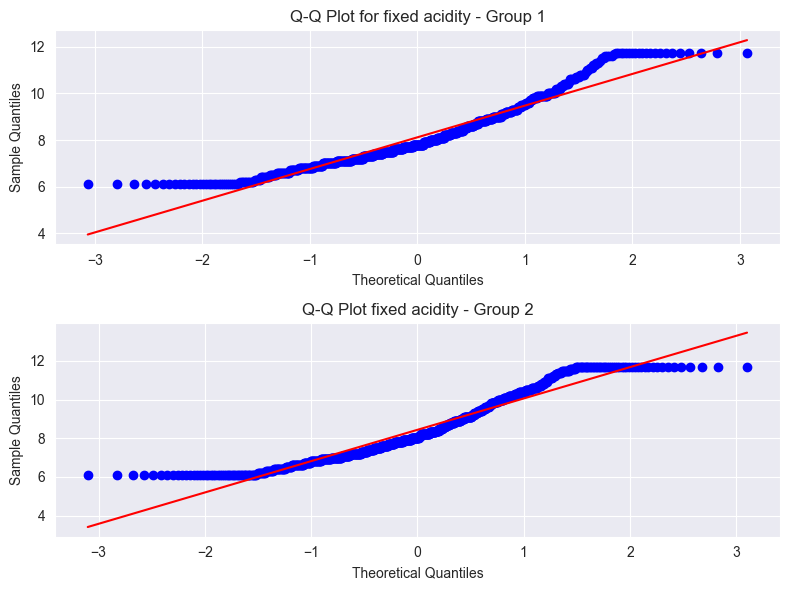

Results of the tests for assumptions for 2-sample t-tests for groups in volatile acidity:
----------------------------------------------------------------------
Shapiro-Wilk Test - Group 1: Statistic = 0.9728161692619324 P-value = 1.604869903637507e-09
Shapiro-Wilk Test - Group 2: Statistic = 0.9451754093170166 P-value = 1.1732418523844029e-15
Levene's Test - P-value = 0.9526146319079489
One or both groups may not meet the assumptions for the t-test.
--------------------------------------------------
D'Agostino and Pearson's omnibus Test for Normality - Group 1: Statistic = 46.40307657917243 P-value = 8.388802101496637e-11
D'Agostino and Pearson's omnibus Test for Normality - Group 2: Statistic = 45.91989639696297 P-value = 1.0681228173648996e-10
One or both groups may not be normally distributed.
--------------------------------------------------


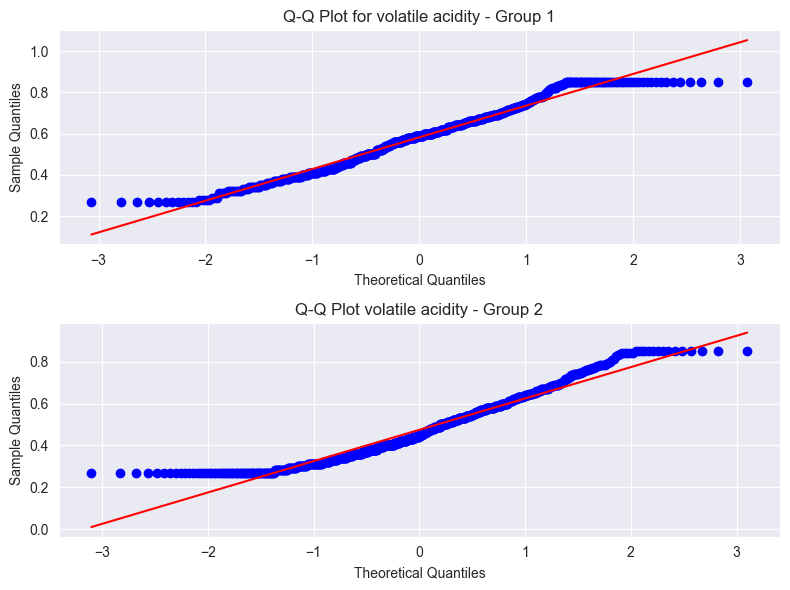

Results of the tests for assumptions for 2-sample t-tests for groups in citric acid:
----------------------------------------------------------------------
Shapiro-Wilk Test - Group 1: Statistic = 0.93717360496521 P-value = 8.85238474219324e-16
Shapiro-Wilk Test - Group 2: Statistic = 0.9374961853027344 P-value = 8.489503519141983e-17
Levene's Test - P-value = 0.0011904900437099235
One or both groups may not meet the assumptions for the t-test.
--------------------------------------------------
D'Agostino and Pearson's omnibus Test for Normality - Group 1: Statistic = 85.91093567011183 P-value = 2.211451156255065e-19
D'Agostino and Pearson's omnibus Test for Normality - Group 2: Statistic = 679.7042043028966 P-value = 2.5357554782312277e-148
One or both groups may not be normally distributed.
--------------------------------------------------


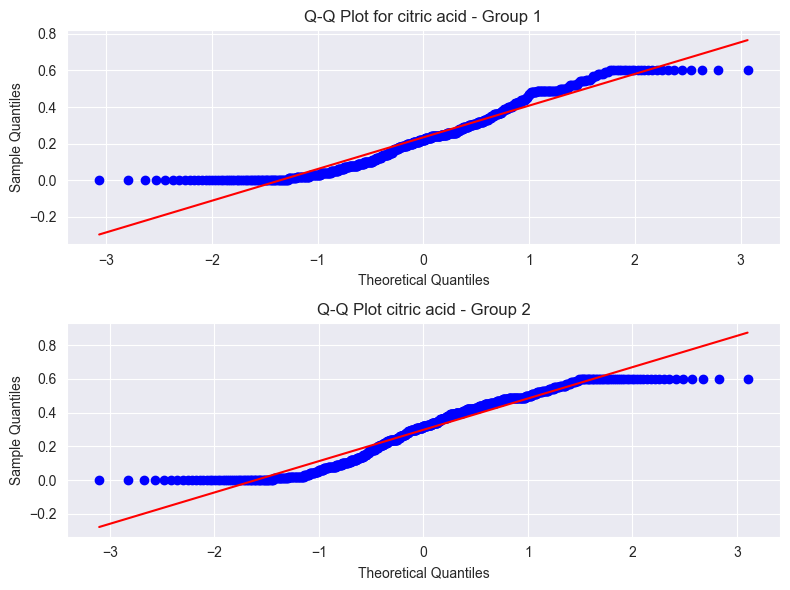

Results of the tests for assumptions for 2-sample t-tests for groups in residual sugar:
----------------------------------------------------------------------
Shapiro-Wilk Test - Group 1: Statistic = 0.8012962341308594 P-value = 2.814634524599182e-27
Shapiro-Wilk Test - Group 2: Statistic = 0.7881011366844177 P-value = 1.5599104191118105e-29
Levene's Test - P-value = 0.2710195715949715
One or both groups may not meet the assumptions for the t-test.
--------------------------------------------------
D'Agostino and Pearson's omnibus Test for Normality - Group 1: Statistic = 189.23551831578615 P-value = 8.091505015777018e-42
D'Agostino and Pearson's omnibus Test for Normality - Group 2: Statistic = 244.2696473034797 P-value = 9.068178072724417e-54
One or both groups may not be normally distributed.
--------------------------------------------------


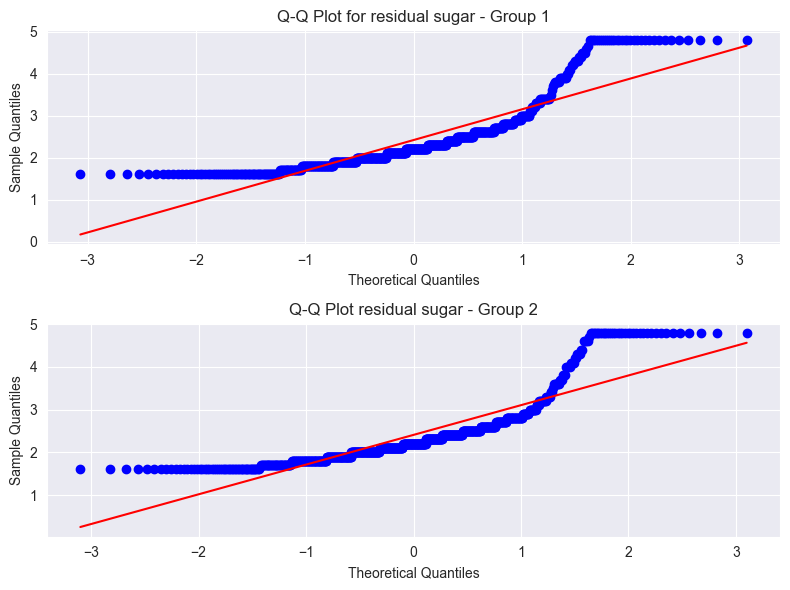

Results of the tests for assumptions for 2-sample t-tests for groups in chlorides:
----------------------------------------------------------------------
Shapiro-Wilk Test - Group 1: Statistic = 0.9115790724754333 P-value = 7.684010031286447e-19
Shapiro-Wilk Test - Group 2: Statistic = 0.9024194478988647 P-value = 5.308382709548255e-21
Levene's Test - P-value = 0.5888866688597006
One or both groups may not meet the assumptions for the t-test.
--------------------------------------------------
D'Agostino and Pearson's omnibus Test for Normality - Group 1: Statistic = 90.92899573718059 P-value = 1.798951492997649e-20
D'Agostino and Pearson's omnibus Test for Normality - Group 2: Statistic = 141.61624516109413 P-value = 1.7718342373051092e-31
One or both groups may not be normally distributed.
--------------------------------------------------


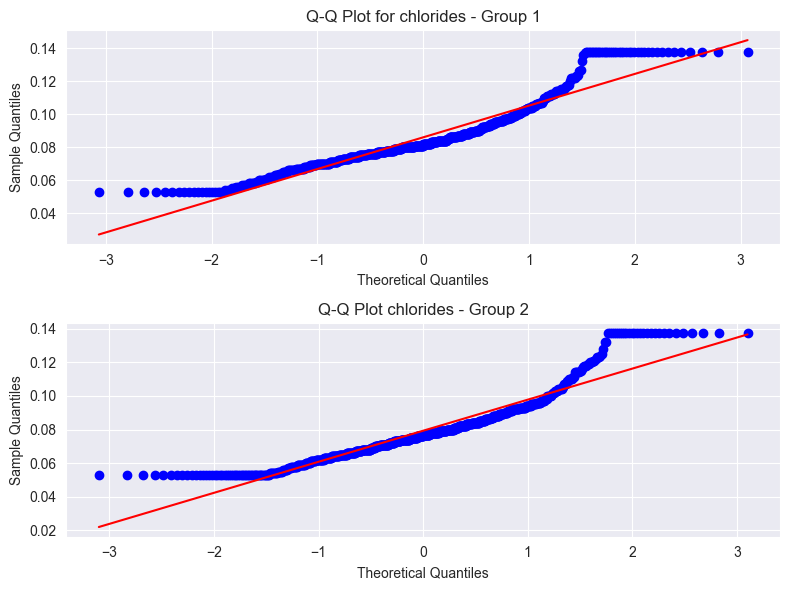

Results of the tests for assumptions for 2-sample t-tests for groups in free sulfur dioxide:
----------------------------------------------------------------------
Shapiro-Wilk Test - Group 1: Statistic = 0.9154644012451172 P-value = 2.0185345208177325e-18
Shapiro-Wilk Test - Group 2: Statistic = 0.9106029272079468 P-value = 3.9058828752248945e-20
Levene's Test - P-value = 0.008815637008585328
One or both groups may not meet the assumptions for the t-test.
--------------------------------------------------
D'Agostino and Pearson's omnibus Test for Normality - Group 1: Statistic = 95.62587640414364 P-value = 1.718322889339068e-21
D'Agostino and Pearson's omnibus Test for Normality - Group 2: Statistic = 63.301311967890875 P-value = 1.7959521338096486e-14
One or both groups may not be normally distributed.
--------------------------------------------------


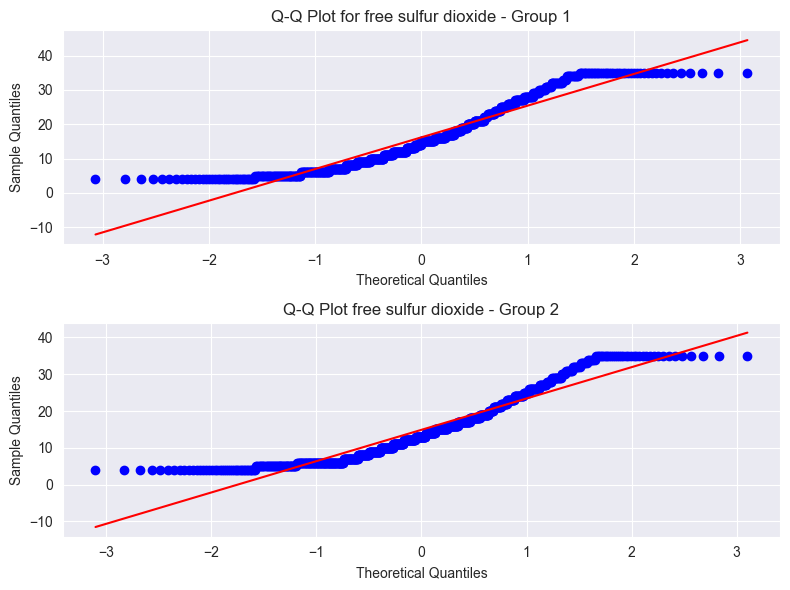

Results of the tests for assumptions for 2-sample t-tests for groups in total sulfur dioxide:
----------------------------------------------------------------------
Shapiro-Wilk Test - Group 1: Statistic = 0.9070423245429993 P-value = 2.585298720806789e-19
Shapiro-Wilk Test - Group 2: Statistic = 0.8996092677116394 P-value = 2.7529273566168004e-21
Levene's Test - P-value = 9.425847160320104e-23
One or both groups may not meet the assumptions for the t-test.
--------------------------------------------------
D'Agostino and Pearson's omnibus Test for Normality - Group 1: Statistic = 180.81877351934105 P-value = 5.4412943257290125e-40
D'Agostino and Pearson's omnibus Test for Normality - Group 2: Statistic = 107.53222882718497 P-value = 4.4634759267460236e-24
One or both groups may not be normally distributed.
--------------------------------------------------


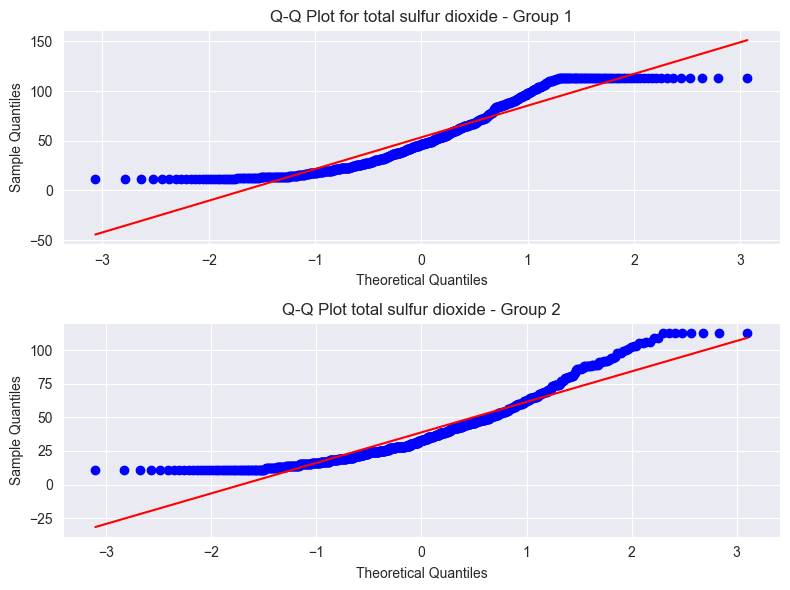

Results of the tests for assumptions for 2-sample t-tests for groups in density:
----------------------------------------------------------------------
Shapiro-Wilk Test - Group 1: Statistic = 0.9816235899925232 P-value = 3.3663792464722064e-07
Shapiro-Wilk Test - Group 2: Statistic = 0.9674768447875977 P-value = 1.5051057622450514e-11
Levene's Test - P-value = 1.65283720247705e-09
One or both groups may not meet the assumptions for the t-test.
--------------------------------------------------
D'Agostino and Pearson's omnibus Test for Normality - Group 1: Statistic = 0.5831325713020905 P-value = 0.7470924904495309
D'Agostino and Pearson's omnibus Test for Normality - Group 2: Statistic = 60.247245348776936 P-value = 8.269455177880625e-14
One or both groups may not be normally distributed.
--------------------------------------------------


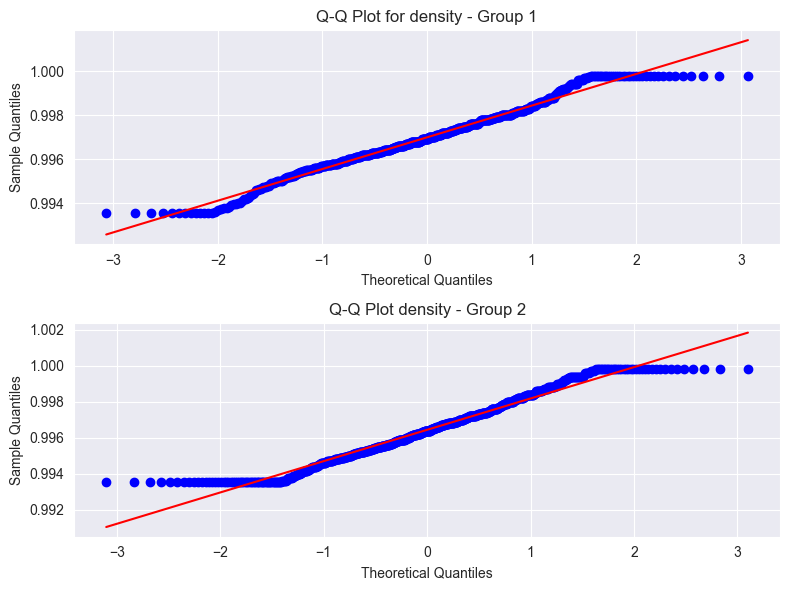

Results of the tests for assumptions for 2-sample t-tests for groups in pH:
----------------------------------------------------------------------
Shapiro-Wilk Test - Group 1: Statistic = 0.9746052026748657 P-value = 4.330839686872423e-09
Shapiro-Wilk Test - Group 2: Statistic = 0.9774540066719055 P-value = 4.431767841595047e-09
Levene's Test - P-value = 0.3355820959773089
One or both groups may not meet the assumptions for the t-test.
--------------------------------------------------
D'Agostino and Pearson's omnibus Test for Normality - Group 1: Statistic = 44.623991417508144 P-value = 2.041847879614912e-10
D'Agostino and Pearson's omnibus Test for Normality - Group 2: Statistic = 30.346129866725985 P-value = 2.572892410442372e-07
One or both groups may not be normally distributed.
--------------------------------------------------


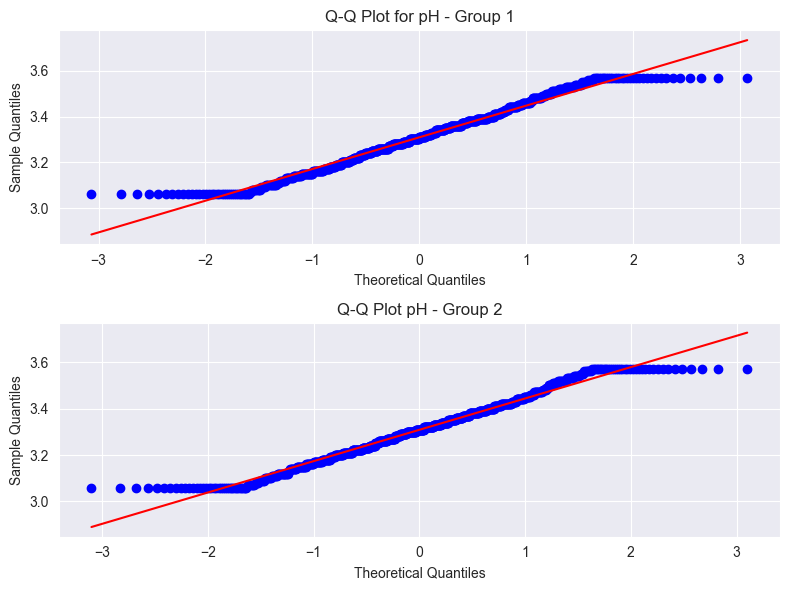

Results of the tests for assumptions for 2-sample t-tests for groups in sulphates:
----------------------------------------------------------------------
Shapiro-Wilk Test - Group 1: Statistic = 0.8590803146362305 P-value = 1.7098787312606135e-23
Shapiro-Wilk Test - Group 2: Statistic = 0.9630088806152344 P-value = 1.6955280495584146e-12
Levene's Test - P-value = 0.001204961991279022
One or both groups may not meet the assumptions for the t-test.
--------------------------------------------------
D'Agostino and Pearson's omnibus Test for Normality - Group 1: Statistic = 134.2122276400181 P-value = 7.181002302833133e-30
D'Agostino and Pearson's omnibus Test for Normality - Group 2: Statistic = 54.216530638053925 P-value = 1.686669369164772e-12
One or both groups may not be normally distributed.
--------------------------------------------------


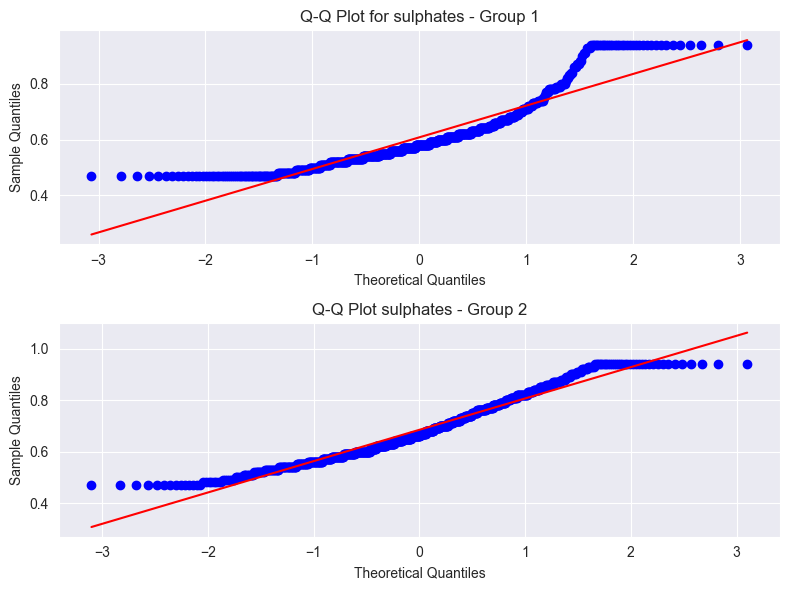

Results of the tests for assumptions for 2-sample t-tests for groups in alcohol:
----------------------------------------------------------------------
Shapiro-Wilk Test - Group 1: Statistic = 0.8493616580963135 P-value = 3.327527710901222e-24
Shapiro-Wilk Test - Group 2: Statistic = 0.9486998319625854 P-value = 4.2727573290200684e-15
Levene's Test - P-value = 9.34186411959721e-30
One or both groups may not meet the assumptions for the t-test.
--------------------------------------------------
D'Agostino and Pearson's omnibus Test for Normality - Group 1: Statistic = 145.89696414793121 P-value = 2.0838995076765002e-32
D'Agostino and Pearson's omnibus Test for Normality - Group 2: Statistic = 327.46829494177155 P-value = 7.78329075269124e-72
One or both groups may not be normally distributed.
--------------------------------------------------


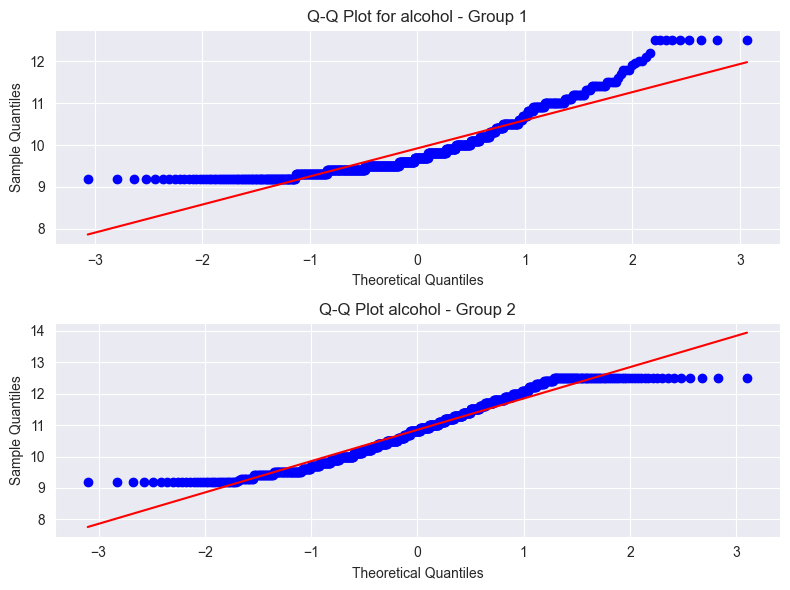

<IPython.core.display.Javascript object>

In [45]:
for col in selected_col_norm_upd.columns:
    hf.test_two_sample_ttest_assumptions(group0_data, group1_data, col)

Based on the analysis above, all of the features don't perfectly meet the assumptions for the two-sample t-test, even though some of the features visually have normal distributions and don't have significant differences between variances. 

Since the distributions are not normal, we will use the Mann-Whitney U test.

## Hypothesis Testing

- Null Hypothesis: there's no difference between the medians of good and bad wine groups.
- Alternative Hypothesis: there is a difference between the medians of good and bad wine groups (two-tailed test).

We will analyze all of the features for the difference between good and bad wine groups.

- The Mann-Whitney U test is a non-parametric test that assesses whether there is a significant difference in the medians of two independent groups. It ranks all the observations from both groups together, and then calculates the sum of the ranks for each group.
     - The test statistic U represents the rank sum of the smaller group, and it can be used to determine if one group tends to have higher or lower values than the other. A larger U Statistic suggests a larger effect size (the magnitude of the difference) between the groups.
     - The P-value is calculated based on the U statistic and the distribution of U under the null hypothesis. For a two-tailed test, the P-value represents the probability of obtaining a U statistic as extreme as the one observed, assuming the null hypothesis is true. 

In [46]:
for col in selected_col_norm_upd.columns:
    print(f"Results for differences in groups in {col}")
    print("-"*40)
    hf.mannwhitneyu_two_sided_test(group0_data, group1_data, col)
    print("-"*70)
    print("")

Results for differences in groups in fixed acidity
----------------------------------------
Mann-Whitney U Statistic: 209106.0
P-value: 0.0037
There is a significant difference between the two groups.
----------------------------------------------------------------------

Results for differences in groups in volatile acidity
----------------------------------------
Mann-Whitney U Statistic: 319337.0
P-value: 0.0
There is a significant difference between the two groups.
----------------------------------------------------------------------

Results for differences in groups in citric acid
----------------------------------------
Mann-Whitney U Statistic: 185372.0
P-value: 0.0
There is a significant difference between the two groups.
----------------------------------------------------------------------

Results for differences in groups in residual sugar
----------------------------------------
Mann-Whitney U Statistic: 227151.5
P-value: 0.6845
There is no significant difference between

<IPython.core.display.Javascript object>

In [47]:
significant_cols = ["volatile acidity", "citric acid", "chlorides", 
                    "total sulfur dioxide", "density", "sulphates", "alcohol"]

<IPython.core.display.Javascript object>

Outcomes of Hypothesis Testing:

Based on the results of the Mann-Whitney U test, most features have significantly different medians for bad and good wines, except for residual sugar and pH. 

## Confidence Intervals

We will calculate confidence intervals for the features that have the lowest p-values from the Mann-Whitney U test:

In [48]:
for col in significant_cols:
    print(f"95% confidence interval for {col} content for good wine:")
    print(sm.stats.DescrStatsW(group1_data[col]).zconfint_mean())
    print("")
    print(f"95% confidence interval for {col} content for bad wine:")
    print(sm.stats.DescrStatsW(group0_data[col]).zconfint_mean())  
    print("")
    print("-"*50)

95% confidence interval for volatile acidity content for good wine:
(0.4631754801210487, 0.48560616104724075)

95% confidence interval for volatile acidity content for bad wine:
(0.5702942747679135, 0.5943213502320867)

--------------------------------------------------
95% confidence interval for citric acid content for good wine:
(0.28456021697035666, 0.3124912433912567)

95% confidence interval for citric acid content for bad wine:
(0.22090446601518163, 0.24847053398481836)

--------------------------------------------------
95% confidence interval for chlorides content for good wine:
(0.07788363319381089, 0.0807138633291376)

95% confidence interval for chlorides content for bad wine:
(0.08444560903309582, 0.08755126596690409)

--------------------------------------------------
95% confidence interval for total sulfur dioxide content for good wine:
(37.02932726778399, 40.51448358061656)

95% confidence interval for total sulfur dioxide content for bad wine:
(50.875069569413185, 56.

<IPython.core.display.Javascript object>

# 5. Applying Linear Machine Learning Models

### Main insights and observations:
- Based on AIC (Akaike Information Criterion) and other evaluation metrics, Logistic regression has a bit better results with the dataframe that doesn't contain insignificant features (pH, residual sugar) and doesn't contain extreme outliers.
- Some features have p-values less than 0.05, indicating statistical significance: volatile acidity, citric acid, free sulfur dioxide, total sulfur dioxide, sulphates, and alcohol.

### Additional notes:
- The difference in AIC and other evaluation metrics between the models is not large. 

- AIC (Akaike Information Criterion) is a way to evaluate the goodness of fit of a statistical model while taking into account its complexity. It provides a trade-off between the model's fit to the data and the number of parameters in the model. 
- Lower AIC values indicate better model fit while penalizing for model complexity. 



In [49]:
selected_cols = data_upd.loc[:, ~data_upd.columns.isin(["quality", "quality_category"])]

# without outliers
selected_cols_trunc = floor_cap_data_upd.loc[:, ~floor_cap_data_upd.columns.isin(["quality", "quality_category"])]

<IPython.core.display.Javascript object>

In [50]:
X = selected_cols.copy(deep=True)
X_short = selected_cols.loc[:, ~selected_cols.columns.isin(["residual sugar", "pH"])] # without non-significant columns
X_trunc = selected_cols_trunc.copy(deep=True) # without outliers
X_trunc_short = selected_cols_trunc.loc[:, ~selected_cols_trunc.columns.isin(["residual sugar", "pH"])] # without outliers
y = floor_cap_data_upd['quality_category']

<IPython.core.display.Javascript object>

In [51]:
def logit_plus_stats(X, y):
    """
    Function to perform a logistic regression and 
    evaluate the results of the model performance.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    X_train_with_const = sm.add_constant(X_train)
    logit_model = sm.Logit(y_train, X_train_with_const)
    result = logit_model.fit()
    
    print(result.summary())
    
    # Calculate the AIC
    aic = result.aic
    print("AIC:", aic)
    
    # Get the coefficients and corresponding feature names
    coefficients = result.params[1:]
    feature_names = X.columns
    
    # df to display the coefficients with their feature names
    coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    
    # Sort the coefficients in descending order of absolute values to get the most important features
    coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs()
    coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)
    
    # The most important features and their coefficients
    print("\nMost Important Features:")
    print(coefficients_df[['Feature', 'Coefficient']])
    
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    y_pred = logreg.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print("-"*50)
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", conf_matrix)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", roc_auc)

<IPython.core.display.Javascript object>

In [52]:
logit_plus_stats(X, y)

Optimization terminated successfully.
         Current function value: 0.515408
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       quality_category   No. Observations:                 1087
Model:                          Logit   Df Residuals:                     1075
Method:                           MLE   Df Model:                           11
Date:                Wed, 26 Jul 2023   Pseudo R-squ.:                  0.2544
Time:                        22:14:57   Log-Likelihood:                -560.25
converged:                       True   LL-Null:                       -751.38
Covariance Type:            nonrobust   LLR p-value:                 3.533e-75
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -71.1622     98.177     -0.725      0.469    -263.586     121.262

<IPython.core.display.Javascript object>

In [53]:
logit_plus_stats(X_short, y)

Optimization terminated successfully.
         Current function value: 0.515494
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       quality_category   No. Observations:                 1087
Model:                          Logit   Df Residuals:                     1077
Method:                           MLE   Df Model:                            9
Date:                Wed, 26 Jul 2023   Pseudo R-squ.:                  0.2543
Time:                        22:14:57   Log-Likelihood:                -560.34
converged:                       True   LL-Null:                       -751.38
Covariance Type:            nonrobust   LLR p-value:                 9.071e-77
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -49.1633     71.212     -0.690      0.490    -188.737      90.410

<IPython.core.display.Javascript object>

In [54]:
logit_plus_stats(X_trunc, y)

Optimization terminated successfully.
         Current function value: 0.505970
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       quality_category   No. Observations:                 1087
Model:                          Logit   Df Residuals:                     1075
Method:                           MLE   Df Model:                           11
Date:                Wed, 26 Jul 2023   Pseudo R-squ.:                  0.2680
Time:                        22:14:57   Log-Likelihood:                -549.99
converged:                       True   LL-Null:                       -751.38
Covariance Type:            nonrobust   LLR p-value:                 1.565e-79
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -151.3522    110.044     -1.375      0.169    -367.035      64.331

<IPython.core.display.Javascript object>

In [55]:
logit_plus_stats(X_trunc_short, y)

Optimization terminated successfully.
         Current function value: 0.506409
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       quality_category   No. Observations:                 1087
Model:                          Logit   Df Residuals:                     1077
Method:                           MLE   Df Model:                            9
Date:                Wed, 26 Jul 2023   Pseudo R-squ.:                  0.2674
Time:                        22:14:57   Log-Likelihood:                -550.47
converged:                       True   LL-Null:                       -751.38
Covariance Type:            nonrobust   LLR p-value:                 5.559e-81
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -79.5395     80.957     -0.982      0.326    -238.212      79.133

<IPython.core.display.Javascript object>

#### Outcomes:

Based on the outcomes above, particularly AIC, we can tell that the model that uses the dataset without outliers and without certain features that don't differ between good and bad wine groups, performs better.

# Final thoughts and conclusions:
- If we divide quality ratings into binary groups (ratings 3-5 to be 0 and ratings 6-8 to be 1), we can observe a difference in distributions for most features between these groups.
- The most obvious differences in distributions are in columns: alcohol, citric acid, and volatile acidity.
- Linear models perform better when we get rid of extreme outliers and unnecessary features.
- Based on the result of the Logistic regression, some features are more statistically significant: volatile acidity, citric acid, free sulfur dioxide, total sulfur dioxide, sulphates, and alcohol.

# Further Analysis:
- The regression models should be optimized to improve the performance.
- It would be interesting to have information about the wineries since the wines coming from the same winery could possess similar features and be clustered.

# Recommendations:
- Based on the analysis of the red variants of the Portuguese "Vinho Verde" wine, we could advise producers to have wine characteristics in these ranges:
  -  volatile acidity: (0.46 - 0.49)
  -  citric acid: (0.28 - 0.31)
  -  chlorides: (0.08)
  -  total sulfur dioxide: (37.03 - 40.51)
  -  density: (0.996)
  -  sulphates: (0.68 - 0.69)
  -  alcohol: (10.78 - 10.92)
  